## Index

- <a href = #link1>Dataset Overview</a>
- <a href = #link2>EDA</a>
- <a href = #link3>Univariate Analysis</a>
- <a href = #link4> Bivariate Analysis</a>
- <a href = #link5>Correlation Heatmap</a>
- <a href = #link6>Data Pre-Processing</a>
- <a href = #link7>Outlier Treatment</a>
- <a href = #link8>Model Building - Approach</a>
- <a href = #link9>Model evaluation criterion</a>
- <a href = #link10>Split the dataset</a>
- <a href = #link11>Building the model</a>
- <a href = #link12>Logistics Regression</a>
- <a href = #link13>Oversampling train data using SMOTE</a>
- <a href = #link14>Evaluate model perfomance using KFold and cross_val score</a>
- <a href = #link15>Regularization</a>
- <a href = #link16>Undersampling train data using SMOTE</a>
- <a href = #link17>Logistic Regression on undersampled data</a>
- <a href = #link18>Model Building - Bagging & Boosting</a>
- <a href = #link19>Algorith Comparison</a>
- <a href = #link20>Hyperparameter Tuning</a>
- <a href = #link21>Decision Tree</a>
- <a href = #link22>Decision Tree - GridSearchCV</a>
- <a href = #link23>Decision Tree - RandomizedSearchCV</a>
- <a href = #link24>XGBoost</a>
- <a href = #link25>XGBoost - GridSearchCV</a>
- <a href = #link26>XGBoost - RandomizedSearchCV</a>
- <a href = #link27>Gradient Boosting</a>
- <a href = #link28>Gradient Boosting - GridsearchCV</a>
- <a href = #link29>Gradient Boosting - Randomizedsearch CV</a>
- <a href = #link30>Model Performance</a>
- <a href = #link31>Insights & Recommendations</a>


# Problem Statement:

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards

# Objective:

- Explore and visualize the dataset.
- Build a classification model to predict if the customer is going to churn or not
- Optimize the model using appropriate techniques
- Generate a set of insights and recommendations that will help the bank

# Data Description:


* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

## <a id = "link1"></a> Dataset Overview

In [288]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)

from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score


import imblearn
from imblearn.over_sampling import SMOTE


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#### Load and Overview the dataset

In [359]:
df = pd.read_csv('BankChurners.csv')


In [360]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [361]:
df.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189  

[5 rows x 21 columns]

**Percentage of missing values in each column**

In [292]:
pd.DataFrame(data={'% of Missing Values':round(df.isna().sum()/df.isna().count()*100,2)})

% of Missing Values
CLIENTNUM                                 0.0
Attrition_Flag                            0.0
Customer_Age                              0.0
Gender                                    0.0
Dependent_count                           0.0
Education_Level                           0.0
Marital_Status                            0.0
Income_Category                           0.0
Card_Category                             0.0
Months_on_book                            0.0
Total_Relationship_Count                  0.0
Months_Inactive_12_mon                    0.0
Contacts_Count_12_mon                     0.0
Credit_Limit                              0.0
Total_Revolving_Bal                       0.0
Avg_Open_To_Buy                           0.0
Total_Amt_Chng_Q4_Q1                      0.0
Total_Trans_Amt                           0.0
Total_Trans_Ct                            0.0
Total_Ct_Chng_Q4_Q1                       0.0
Avg_Utilization_Ratio                     0.0

**Observation:**

None of the variables have any missing values.

**Checking the number of unique values in each column**

In [293]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

**Observation:**

- we can drop clientnum column as it is unique for each customer.

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

**Observation**

- There are a total of 21 columns with 10,127 observations.
- Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category & Card_Category are object datatype and the remaining columns are all of either int or float type which means they are continuous variables.

In [295]:
#Making a list of all catrgorical variables 
cat_col=['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category','Card_Category']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print('~@@~'*15)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~
F    5358
M    4769
Name: Gender, dtype: int64
~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~~@@~
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype

In [296]:
#Dropping clientnum column
df.drop(columns='CLIENTNUM',inplace=True)

In [297]:
df.describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

In [298]:
df['Months_on_book'].median()

36.0

**Observation:**

- **Attrition_Flag:** - Dichotomous variable with values 1 and 0. 1627 customers are attrited and 8500 customers aren't.
- **Customer_Age:** Continuous variable. Mean age is 46 years and min and max are 26 years and 73 years respectively. Mean and median (IQR 50%) seems to be the same.
- **Dependent_count:** Continuous variable. 
- **Gender:** Categorical variable (object datatype). I will create dummies later if needed.
- **Dependent_count:** Mean and median of dependents are equal at 2. 
- **Education_Level:** Nominal variable. 3128 of the customers have graduate degree, followed by high school education.
- **Marital Status:** Nominal variable with 4 values. Majority of the customers are married.
- **Income_category:** Nominal variable with 6 values.  Majority of the customers have < 40K
- **Card_Category:** 4 distinct values and majority of the customers have blue category card.
- **Months_on_book:** Continuous variable. Mean months on book is 35 months and median is around 36 months.
- **Total_Relationship_Count:** Continuous variable with a mean of 3.8 and median products held by customer is around 4.
- **Months_Inactive_12_mon:** Average months inactive in the last 12 months timeframe is around 2.3 and median is also at 2.
- **Contacts_Count_12_mon:** Median & mean contacts are around 2 in the last 12 months.
- **Credit_Limit:** Credit limit mean is at 8631 and median is 4549. Max is around 34516 and 25% of the values are greater than 11067 so I will have to check for outliers and treat them separetely.
- **Total_Revolving_Bal:** Average Total revolving balance is 1162 and median is 1276.
- **Avg_Open_To_Buy:** Mean open to buy is around 7469 and median is around 3474. Open to buy max and credit limit seem to have the same values which warrants a deep dive into outlier analysis.
- **Total_Amt_Chng_Q4_Q1:** Mean change in transaction amount is around .74 and median is around .76 from last quarter to this quarter.
- **Total_Trans_Amt:** Average transaction amount is 64 and median is 67.
- **Total_Ct_Chng_Q4_Q1:** Average change in transaction count from Q4 to Q1 is .71 and median is around .70
- **Avg_Utilization_Ratio:** Average credit card utilization ratio is .27 and median is .176.

In [299]:
#Converting the data type of each categorical variable to 'category'
for column in cat_col:
    df[column]=df[column].astype('category')

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

## <a id = "link2"></a> EDA

## <a id = "link3"></a> Univariate Analysis

In [301]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,15), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

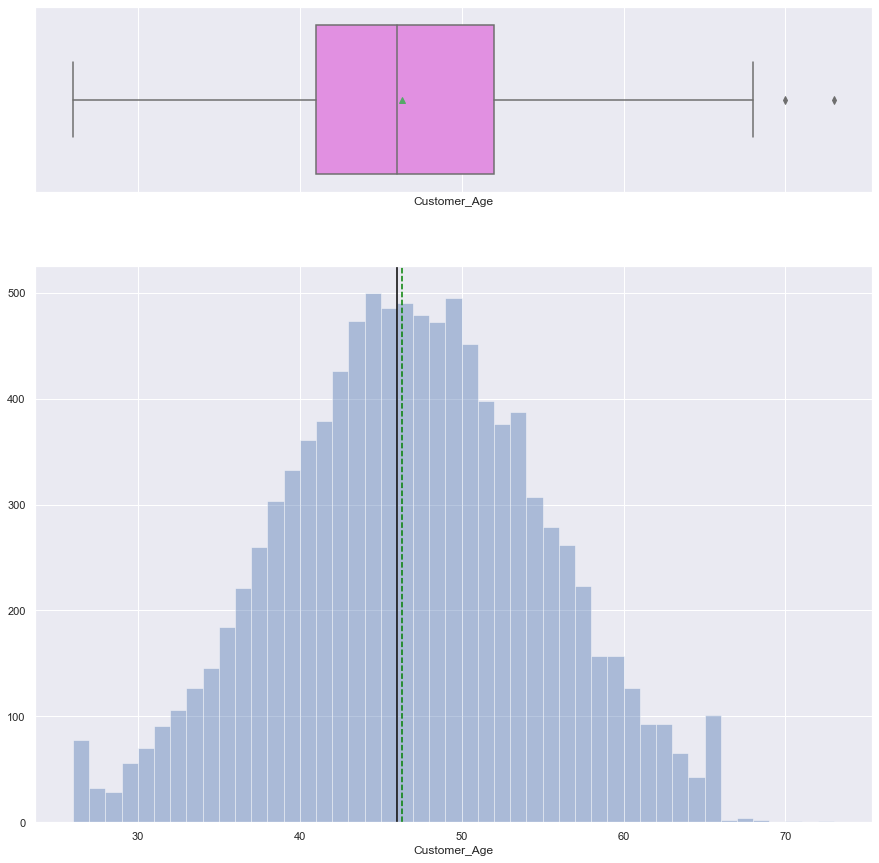

In [302]:
histogram_boxplot(df['Customer_Age'])

- Age distribution looks normally distributed.
- Box plot tells us that there are outliers.
- Age could play a role in determining churn and we can explore this in our bivariate analysis.

In [303]:
#Using Inter Quartile Range to identify outliers
Q1 = df['Customer_Age'].quantile(0.25)
Q3 = df['Customer_Age'].quantile(0.75)
IQR = Q3 - Q1
q1 = (Q1 - 1.5 * IQR)
q3 = (Q3 + 1.5 * IQR)
print(q1,q3)
print(
    'Outliers < (Q1 - 1.5 * IQR)',q1,'count of records',df.loc[df['Customer_Age']<q1].count(),
    'Outliers > (Q3 + 1.5 * IQR):',q3,'count of records',df.loc[df['Customer_Age']>q3].count()
     )




24.5 68.5
Outliers < (Q1 - 1.5 * IQR) 24.5 count of records Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64 Outliers > (Q3 + 1.5 * IQR): 68.5 count of records Attrition_Flag              2
Customer_Age                2
Gender                      2
Dependent_count             2
Education_Level             2
Marital_Status              2
Income_Category             2
Card_Category               2
Months_on_book              2
Total_

**There are 2 observations that are deemed outliers if I go by IQR.**

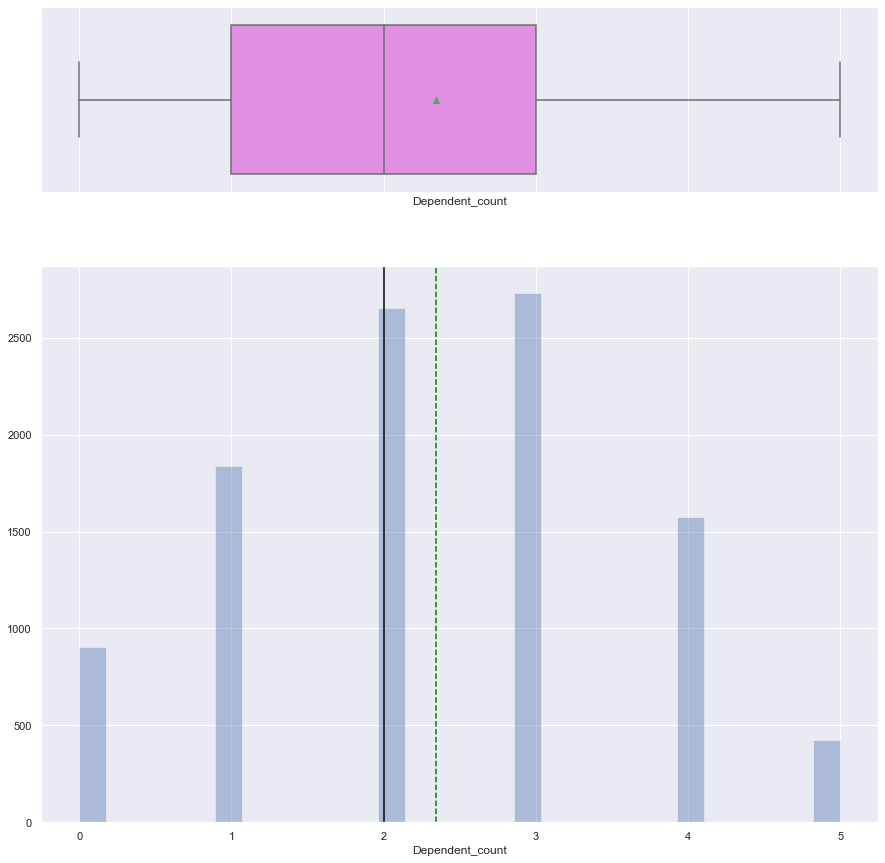

In [304]:
histogram_boxplot(df['Dependent_count'])

Mean is around 2.25 and Median is around 1.9. No outliers.

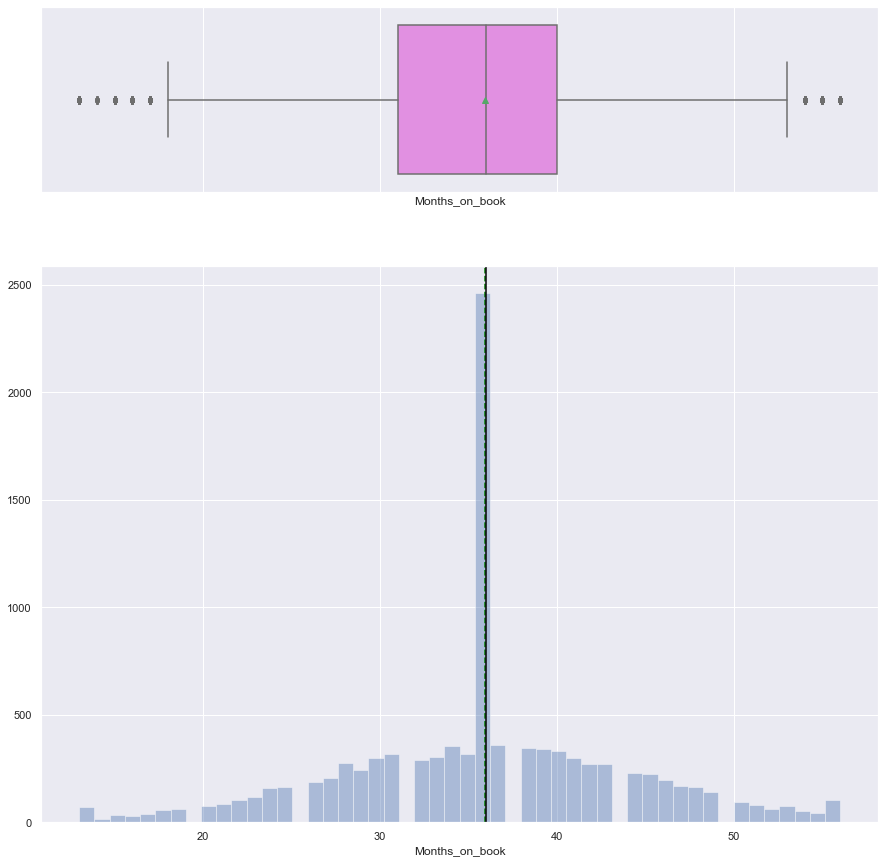

In [305]:
histogram_boxplot(df['Months_on_book'])

There are outliers and in the below steps we will identify them.

In [306]:
#Using Inter Quartile Range to identify outliers
Q1 = df['Months_on_book'].quantile(0.25)
Q3 = df['Months_on_book'].quantile(0.75)
IQR = Q3 - Q1
q1 = (Q1 - 1.5 * IQR)
q3 = (Q3 + 1.5 * IQR)
print(q1,q3)
print(
    'Outliers <(Q1 - 1.5 * IQR) ',q1,'count of records',df.loc[df['Months_on_book']<q1].count(),
    'Outliers > (Q3 + 1.5 * IQR):',q3,'count of records',df.loc[df['Months_on_book']>q3].count()
     )



17.5 53.5
Outliers <(Q1 - 1.5 * IQR)  17.5 count of records Attrition_Flag              188
Customer_Age                188
Gender                      188
Dependent_count             188
Education_Level             188
Marital_Status              188
Income_Category             188
Card_Category               188
Months_on_book              188
Total_Relationship_Count    188
Months_Inactive_12_mon      188
Contacts_Count_12_mon       188
Credit_Limit                188
Total_Revolving_Bal         188
Avg_Open_To_Buy             188
Total_Amt_Chng_Q4_Q1        188
Total_Trans_Amt             188
Total_Trans_Ct              188
Total_Ct_Chng_Q4_Q1         188
Avg_Utilization_Ratio       188
dtype: int64 Outliers > (Q3 + 1.5 * IQR): 53.5 count of records Attrition_Flag              198
Customer_Age                198
Gender                      198
Dependent_count             198
Education_Level             198
Marital_Status              198
Income_Category             198
Card_Categor

In [307]:
df[df['Months_on_book']>53.5].count()

Attrition_Flag              198
Customer_Age                198
Gender                      198
Dependent_count             198
Education_Level             198
Marital_Status              198
Income_Category             198
Card_Category               198
Months_on_book              198
Total_Relationship_Count    198
Months_Inactive_12_mon      198
Contacts_Count_12_mon       198
Credit_Limit                198
Total_Revolving_Bal         198
Avg_Open_To_Buy             198
Total_Amt_Chng_Q4_Q1        198
Total_Trans_Amt             198
Total_Trans_Ct              198
Total_Ct_Chng_Q4_Q1         198
Avg_Utilization_Ratio       198
dtype: int64

**There are 188 rows and 198 observations that are outliers if I go by IQR**

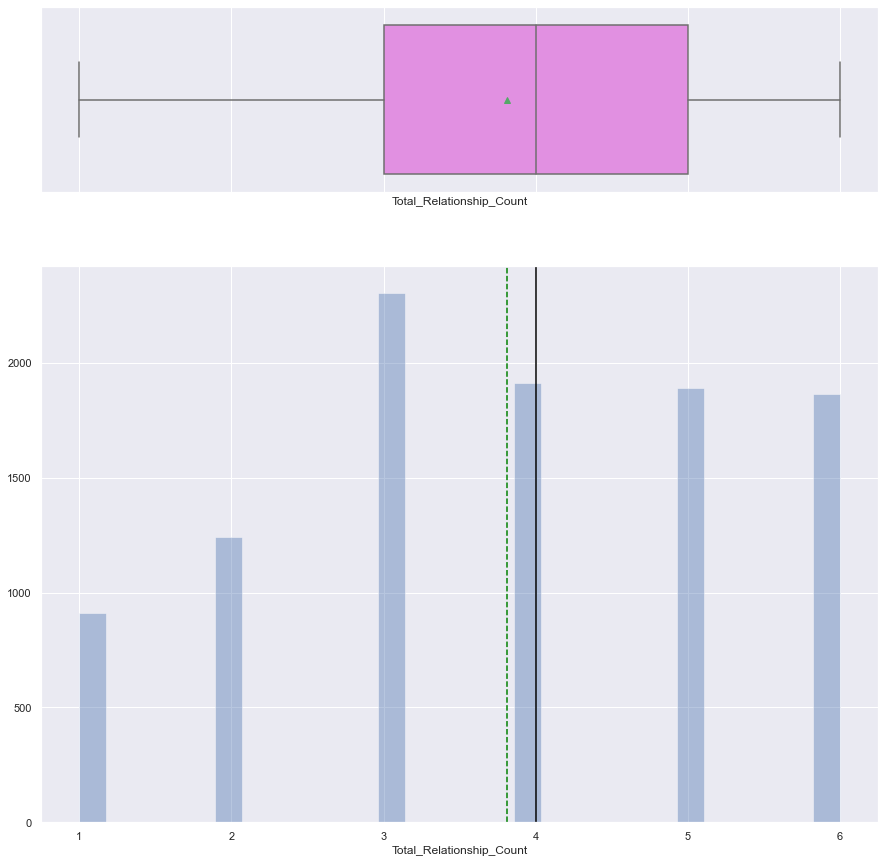

In [308]:
histogram_boxplot(df['Total_Relationship_Count'])

Mean and median for total products held by the customer are pretty much around 4. Didn't see any outliers.

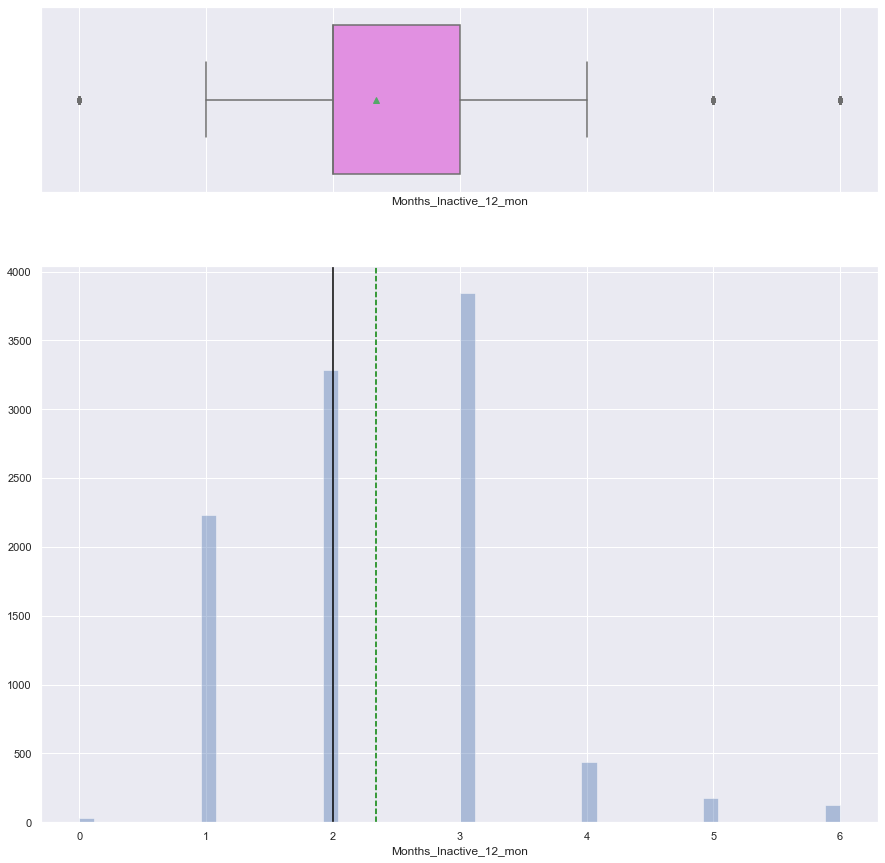

In [309]:
histogram_boxplot(df['Months_Inactive_12_mon'])

In [310]:
#Using Inter Quartile Range to identify outliers
Q1 = df['Months_Inactive_12_mon'].quantile(0.25)
Q3 = df['Months_Inactive_12_mon'].quantile(0.75)
IQR = Q3 - Q1
q1 = (Q1 - 1.5 * IQR)
q3 = (Q3 + 1.5 * IQR)
print(q1,q3)
print(
    'Outliers <(Q1 - 1.5 * IQR) ',q1,'count of records',df.loc[df['Months_Inactive_12_mon']<q1].count(),
    'Outliers > (Q3 + 1.5 * IQR):',q3,'count of records',df.loc[df['Months_Inactive_12_mon']>q3].count()
     )


0.5 4.5
Outliers <(Q1 - 1.5 * IQR)  0.5 count of records Attrition_Flag              29
Customer_Age                29
Gender                      29
Dependent_count             29
Education_Level             29
Marital_Status              29
Income_Category             29
Card_Category               29
Months_on_book              29
Total_Relationship_Count    29
Months_Inactive_12_mon      29
Contacts_Count_12_mon       29
Credit_Limit                29
Total_Revolving_Bal         29
Avg_Open_To_Buy             29
Total_Amt_Chng_Q4_Q1        29
Total_Trans_Amt             29
Total_Trans_Ct              29
Total_Ct_Chng_Q4_Q1         29
Avg_Utilization_Ratio       29
dtype: int64 Outliers > (Q3 + 1.5 * IQR): 4.5 count of records Attrition_Flag              302
Customer_Age                302
Gender                      302
Dependent_count             302
Education_Level             302
Marital_Status              302
Income_Category             302
Card_Category               302
Mont

**There are 29 & 302 outliers in Months Inactive 12 months

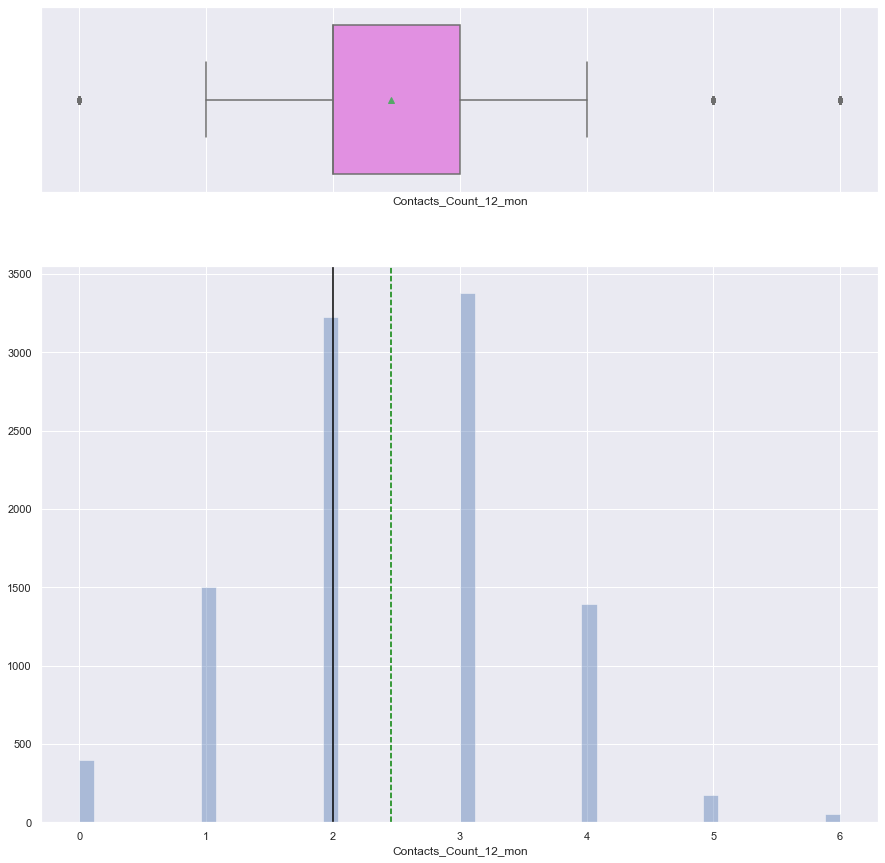

In [311]:
histogram_boxplot(df['Contacts_Count_12_mon'])

In [312]:
#Using Inter Quartile Range to identify outliers
Q1 = df['Contacts_Count_12_mon'].quantile(0.25)
Q3 = df['Contacts_Count_12_mon'].quantile(0.75)
IQR = Q3 - Q1
q1 = (Q1 - 1.5 * IQR)
q3 = (Q3 + 1.5 * IQR)
print(q1,q3)
print(
    'Outliers <(Q1 - 1.5 * IQR) ',q1,'count of records',df.loc[df['Contacts_Count_12_mon']<q1].count(),
    'Outliers > (Q3 + 1.5 * IQR):',q3,'count of records',df.loc[df['Contacts_Count_12_mon']>q3].count()
     )



0.5 4.5
Outliers <(Q1 - 1.5 * IQR)  0.5 count of records Attrition_Flag              399
Customer_Age                399
Gender                      399
Dependent_count             399
Education_Level             399
Marital_Status              399
Income_Category             399
Card_Category               399
Months_on_book              399
Total_Relationship_Count    399
Months_Inactive_12_mon      399
Contacts_Count_12_mon       399
Credit_Limit                399
Total_Revolving_Bal         399
Avg_Open_To_Buy             399
Total_Amt_Chng_Q4_Q1        399
Total_Trans_Amt             399
Total_Trans_Ct              399
Total_Ct_Chng_Q4_Q1         399
Avg_Utilization_Ratio       399
dtype: int64 Outliers > (Q3 + 1.5 * IQR): 4.5 count of records Attrition_Flag              230
Customer_Age                230
Gender                      230
Dependent_count             230
Education_Level             230
Marital_Status              230
Income_Category             230
Card_Category   

**There are 399 & 230 observations that are outliers based on IQR**

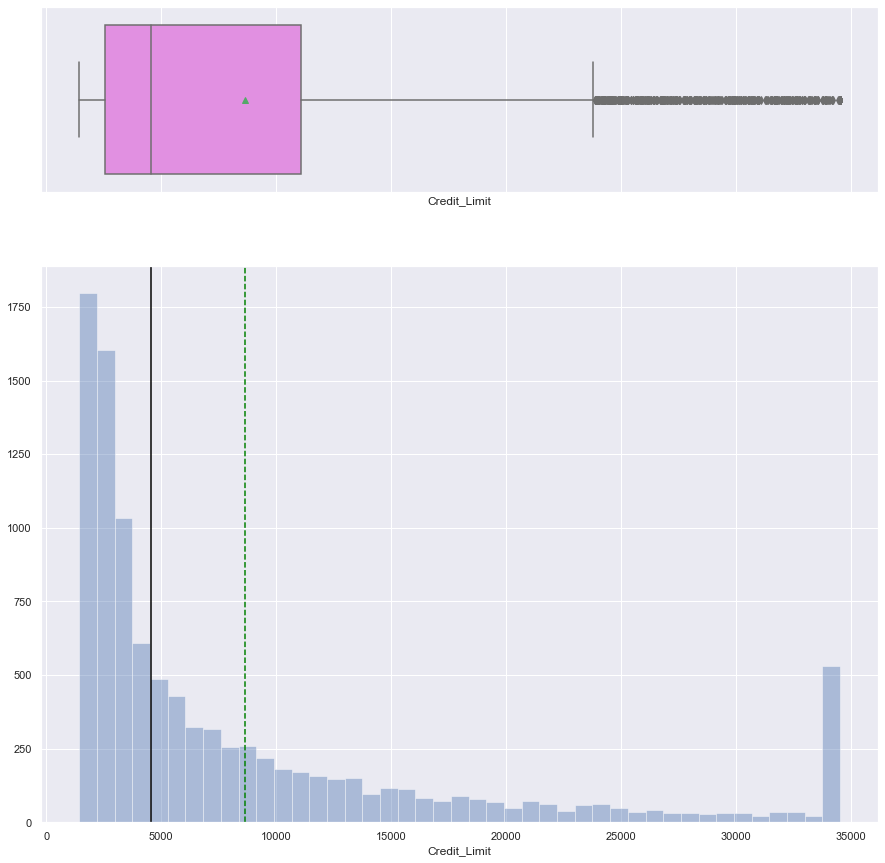

In [313]:
histogram_boxplot(df['Credit_Limit'])

In [314]:
#Using Inter Quartile Range to identify outliers
Q1 = df['Credit_Limit'].quantile(0.25)
Q3 = df['Credit_Limit'].quantile(0.75)
IQR = Q3 - Q1
q1 = (Q1 - 1.5 * IQR)
q3 = (Q3 + 1.5 * IQR)
print(q1,q3)
print(
    'Outliers <(Q1 - 1.5 * IQR) ',q1,'count of records',df.loc[df['Credit_Limit']<q1].count(),
    'Outliers > (Q3 + 1.5 * IQR):',q3,'count of records',df.loc[df['Credit_Limit']>q3].count()
     )


-10213.75 23836.25
Outliers <(Q1 - 1.5 * IQR)  -10213.75 count of records Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64 Outliers > (Q3 + 1.5 * IQR): 23836.25 count of records Attrition_Flag              984
Customer_Age                984
Gender                      984
Dependent_count             984
Education_Level             984
Marital_Status              984
Income_Category             984
Card_Category               984
Mo

**There are 984 observations that are outliers when it comes to credit limit**

-1778.5 3921.5
Outliers <(Q1 - 1.5 * IQR)  -1778.5 count of records Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64 Outliers > (Q3 + 1.5 * IQR): 3921.5 count of records Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book            

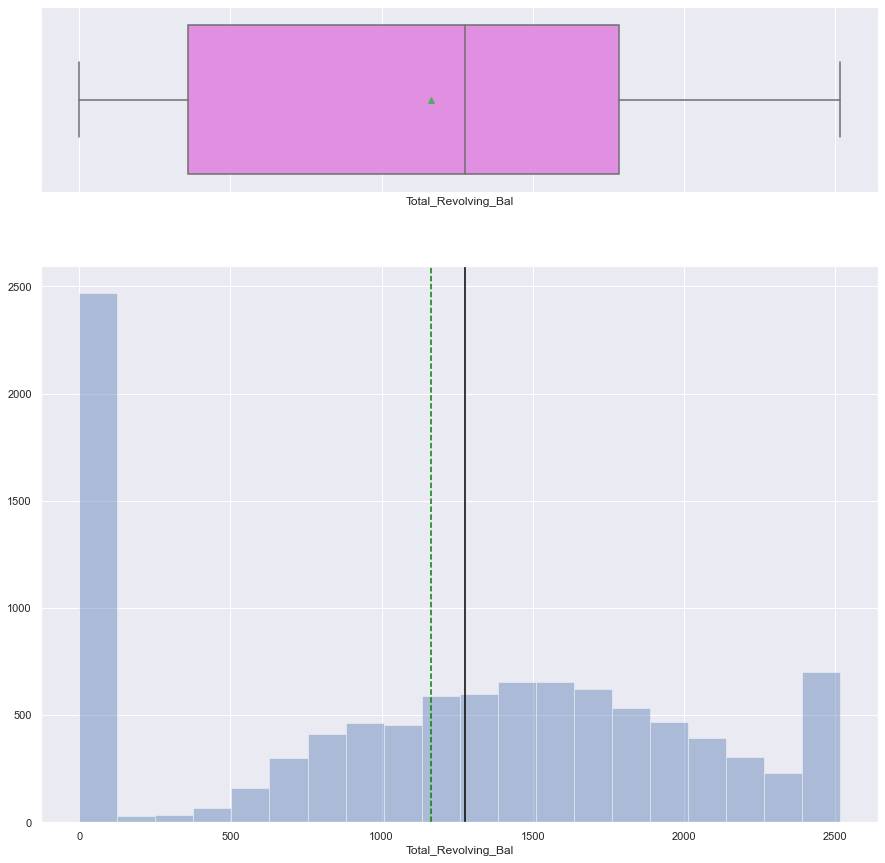

In [315]:
histogram_boxplot(df['Total_Revolving_Bal'])
#Using Inter Quartile Range to identify outliers
Q1 = df['Total_Revolving_Bal'].quantile(0.25)
Q3 = df['Total_Revolving_Bal'].quantile(0.75)
IQR = Q3 - Q1
q1 = (Q1 - 1.5 * IQR)
q3 = (Q3 + 1.5 * IQR)
print(q1,q3)
print(
    'Outliers <(Q1 - 1.5 * IQR) ',q1,'count of records',df.loc[df['Total_Revolving_Bal']<q1].count(),
    'Outliers > (Q3 + 1.5 * IQR):',q3,'count of records',df.loc[df['Total_Revolving_Bal']>q3].count()
     )


No outliers. Mean and Median appears to be almost similar

-11477.25 22660.75
Outliers <(Q1 - 1.5 * IQR)  -11477.25 count of records Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64 Outliers > (Q3 + 1.5 * IQR): 22660.75 count of records Attrition_Flag              963
Customer_Age                963
Gender                      963
Dependent_count             963
Education_Level             963
Marital_Status              963
Income_Category             963
Card_Category               963
Mo

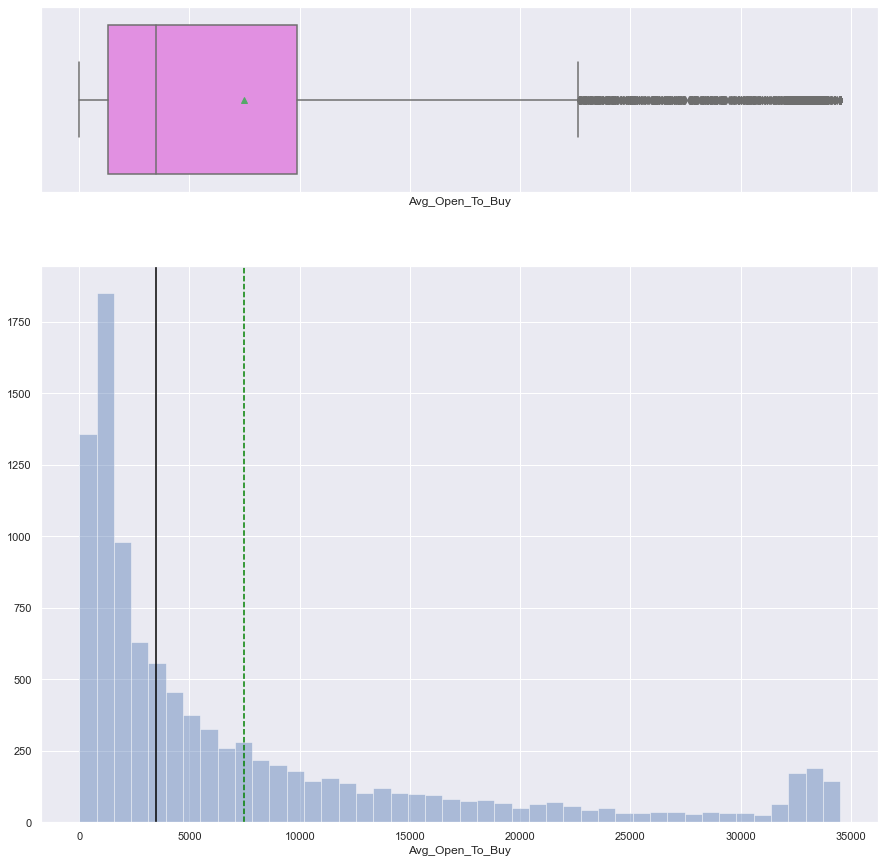

In [316]:
histogram_boxplot(df['Avg_Open_To_Buy'])
#Using Inter Quartile Range to identify outliers
Q1 = df['Avg_Open_To_Buy'].quantile(0.25)
Q3 = df['Avg_Open_To_Buy'].quantile(0.75)
IQR = Q3 - Q1
q1 = (Q1 - 1.5 * IQR)
q3 = (Q3 + 1.5 * IQR)
print(q1,q3)
print(
    'Outliers <(Q1 - 1.5 * IQR) ',q1,'count of records',df.loc[df['Avg_Open_To_Buy']<q1].count(),
    'Outliers > (Q3 + 1.5 * IQR):',q3,'count of records',df.loc[df['Avg_Open_To_Buy']>q3].count()
     )


**There are 963 observations that are outliers in Avg open to buy**

0.28899999999999987 1.2010000000000003
Outliers <(Q1 - 1.5 * IQR)  0.28899999999999987 count of records Attrition_Flag              47
Customer_Age                47
Gender                      47
Dependent_count             47
Education_Level             47
Marital_Status              47
Income_Category             47
Card_Category               47
Months_on_book              47
Total_Relationship_Count    47
Months_Inactive_12_mon      47
Contacts_Count_12_mon       47
Credit_Limit                47
Total_Revolving_Bal         47
Avg_Open_To_Buy             47
Total_Amt_Chng_Q4_Q1        47
Total_Trans_Amt             47
Total_Trans_Ct              47
Total_Ct_Chng_Q4_Q1         47
Avg_Utilization_Ratio       47
dtype: int64 Outliers > (Q3 + 1.5 * IQR): 1.2010000000000003 count of records Attrition_Flag              348
Customer_Age                348
Gender                      348
Dependent_count             348
Education_Level             348
Marital_Status              348
Income

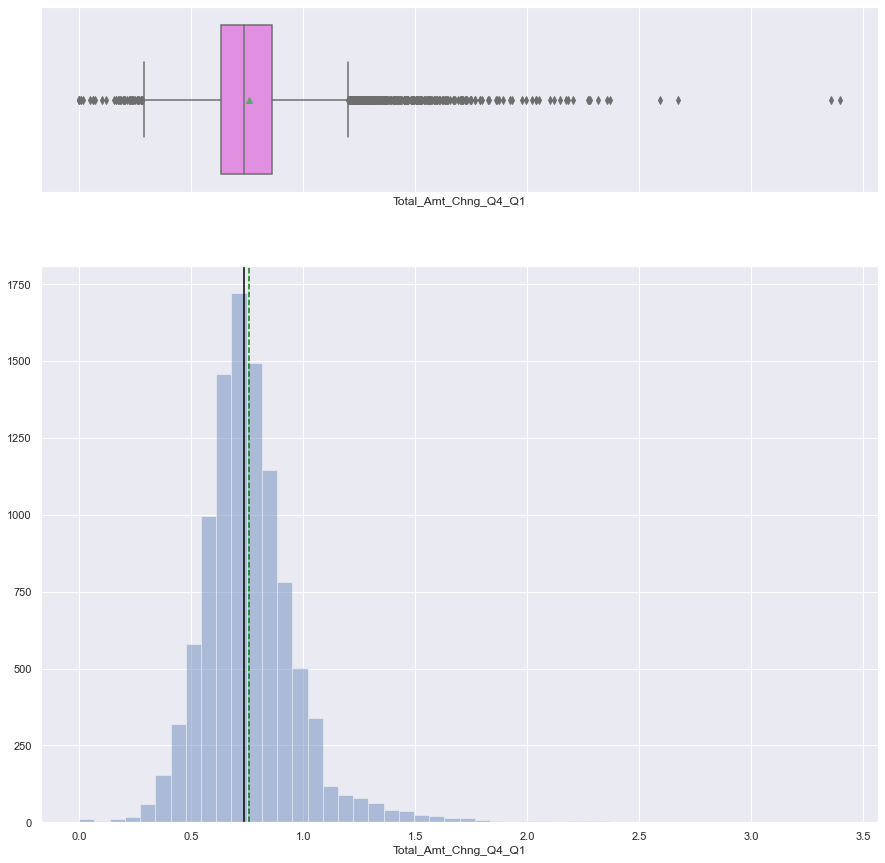

In [317]:
histogram_boxplot(df['Total_Amt_Chng_Q4_Q1'])
#Using Inter Quartile Range to identify outliers
Q1 = df['Total_Amt_Chng_Q4_Q1'].quantile(0.25)
Q3 = df['Total_Amt_Chng_Q4_Q1'].quantile(0.75)
IQR = Q3 - Q1
q1 = (Q1 - 1.5 * IQR)
q3 = (Q3 + 1.5 * IQR)
print(q1,q3)
print(
    'Outliers <(Q1 - 1.5 * IQR) ',q1,'count of records',df.loc[df['Total_Amt_Chng_Q4_Q1']<q1].count(),
    'Outliers > (Q3 + 1.5 * IQR):',q3,'count of records',df.loc[df['Total_Amt_Chng_Q4_Q1']>q3].count()
     )

**There are a total of 395 observations that are outliers.**

-1722.75 8619.25
Outliers <(Q1 - 1.5 * IQR)  -1722.75 count of records Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64 Outliers > (Q3 + 1.5 * IQR): 8619.25 count of records Attrition_Flag              896
Customer_Age                896
Gender                      896
Dependent_count             896
Education_Level             896
Marital_Status              896
Income_Category             896
Card_Category               896
Months

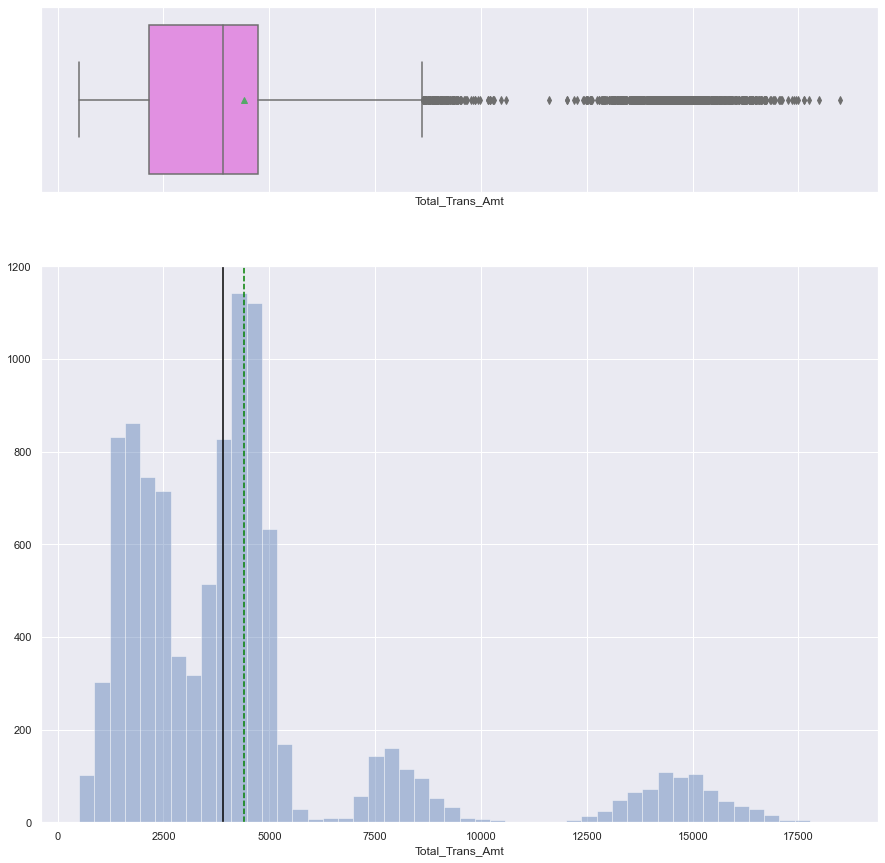

In [318]:
histogram_boxplot(df['Total_Trans_Amt'])
#Using Inter Quartile Range to identify outliers
Q1 = df['Total_Trans_Amt'].quantile(0.25)
Q3 = df['Total_Trans_Amt'].quantile(0.75)
IQR = Q3 - Q1
q1 = (Q1 - 1.5 * IQR)
q3 = (Q3 + 1.5 * IQR)
print(q1,q3)
print(
    'Outliers <(Q1 - 1.5 * IQR) ',q1,'count of records',df.loc[df['Total_Trans_Amt']<q1].count(),
    'Outliers > (Q3 + 1.5 * IQR):',q3,'count of records',df.loc[df['Total_Trans_Amt']>q3].count()
     )

**A Total of 896 observations that are outliers.**

-9.0 135.0
Outliers <(Q1 - 1.5 * IQR)  -9.0 count of records Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64 Outliers > (Q3 + 1.5 * IQR): 135.0 count of records Attrition_Flag              2
Customer_Age                2
Gender                      2
Dependent_count             2
Education_Level             2
Marital_Status              2
Income_Category             2
Card_Category               2
Months_on_book              2
Tota

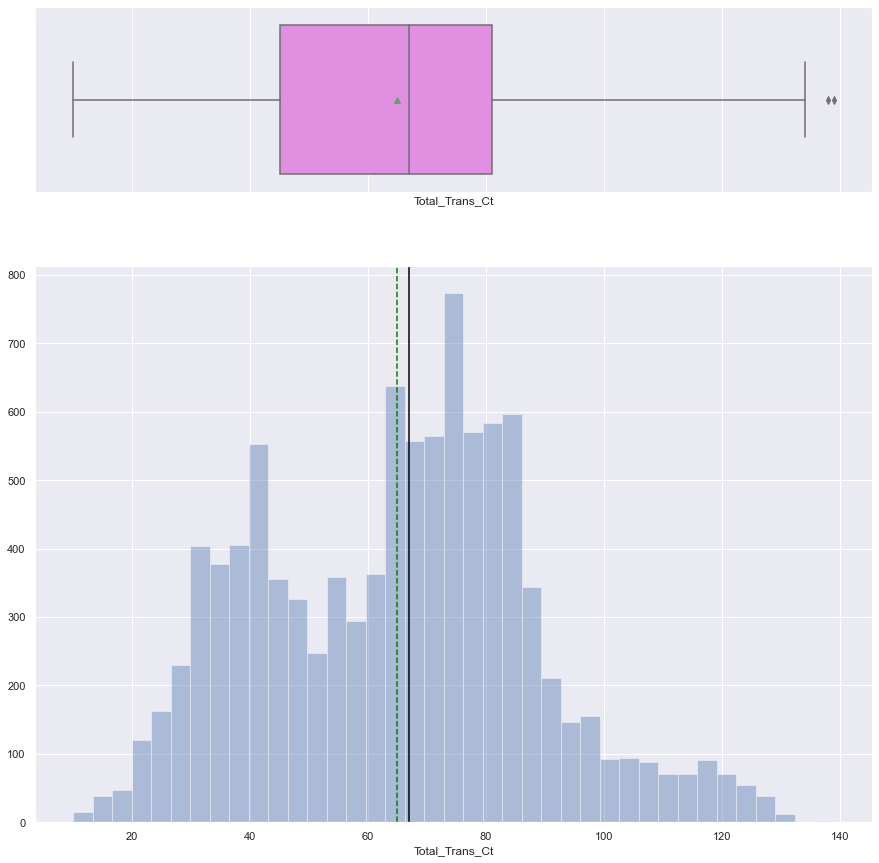

In [319]:
histogram_boxplot(df['Total_Trans_Ct'])
#Using Inter Quartile Range to identify outliers
Q1 = df['Total_Trans_Ct'].quantile(0.25)
Q3 = df['Total_Trans_Ct'].quantile(0.75)
IQR = Q3 - Q1
q1 = (Q1 - 1.5 * IQR)
q3 = (Q3 + 1.5 * IQR)
print(q1,q3)
print(
    'Outliers <(Q1 - 1.5 * IQR) ',q1,'count of records',df.loc[df['Total_Trans_Ct']<q1].count(),
    'Outliers > (Q3 + 1.5 * IQR):',q3,'count of records',df.loc[df['Total_Trans_Ct']>q3].count()
     )

**2 observations are outliers**

0.22800000000000026 1.1719999999999997
Outliers <(Q1 - 1.5 * IQR)  0.22800000000000026 count of records Attrition_Flag              96
Customer_Age                96
Gender                      96
Dependent_count             96
Education_Level             96
Marital_Status              96
Income_Category             96
Card_Category               96
Months_on_book              96
Total_Relationship_Count    96
Months_Inactive_12_mon      96
Contacts_Count_12_mon       96
Credit_Limit                96
Total_Revolving_Bal         96
Avg_Open_To_Buy             96
Total_Amt_Chng_Q4_Q1        96
Total_Trans_Amt             96
Total_Trans_Ct              96
Total_Ct_Chng_Q4_Q1         96
Avg_Utilization_Ratio       96
dtype: int64 Outliers > (Q3 + 1.5 * IQR): 1.1719999999999997 count of records Attrition_Flag              300
Customer_Age                300
Gender                      300
Dependent_count             300
Education_Level             300
Marital_Status              300
Income

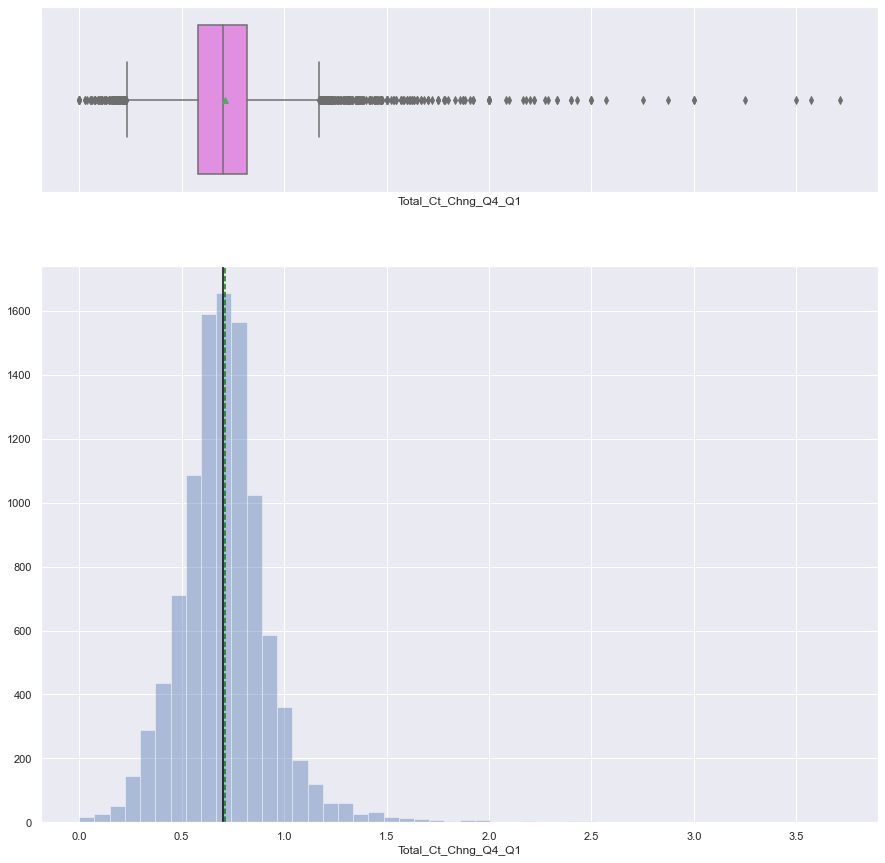

In [320]:
histogram_boxplot(df['Total_Ct_Chng_Q4_Q1'])
#Using Inter Quartile Range to identify outliers
Q1 = df['Total_Ct_Chng_Q4_Q1'].quantile(0.25)
Q3 = df['Total_Ct_Chng_Q4_Q1'].quantile(0.75)
IQR = Q3 - Q1
q1 = (Q1 - 1.5 * IQR)
q3 = (Q3 + 1.5 * IQR)
print(q1,q3)
print(
    'Outliers <(Q1 - 1.5 * IQR) ',q1,'count of records',df.loc[df['Total_Ct_Chng_Q4_Q1']<q1].count(),
    'Outliers > (Q3 + 1.5 * IQR):',q3,'count of records',df.loc[df['Total_Ct_Chng_Q4_Q1']>q3].count()
     )

**A total of 396 observations that are outliers.**

-0.697 1.2229999999999999
Outliers <(Q1 - 1.5 * IQR)  -0.697 count of records Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64 Outliers > (Q3 + 1.5 * IQR): 1.2229999999999999 count of records Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Mont

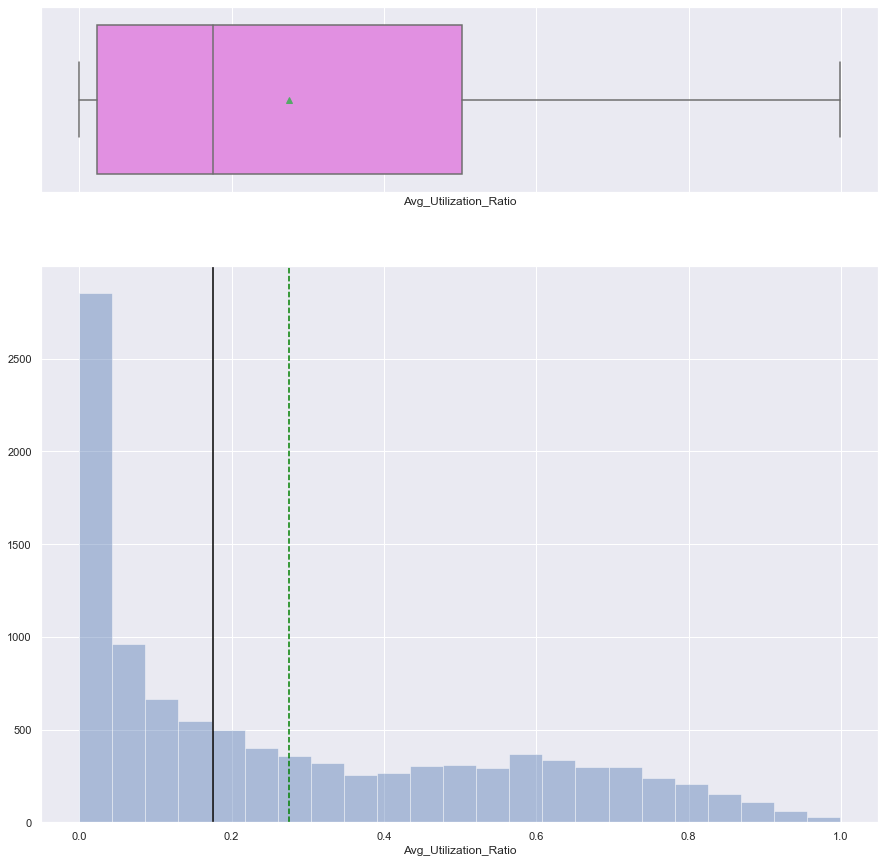

In [321]:
histogram_boxplot(df['Avg_Utilization_Ratio'])
#Using Inter Quartile Range to identify outliers
Q1 = df['Avg_Utilization_Ratio'].quantile(0.25)
Q3 = df['Avg_Utilization_Ratio'].quantile(0.75)
IQR = Q3 - Q1
q1 = (Q1 - 1.5 * IQR)
q3 = (Q3 + 1.5 * IQR)
print(q1,q3)
print(
    'Outliers <(Q1 - 1.5 * IQR) ',q1,'count of records',df.loc[df['Avg_Utilization_Ratio']<q1].count(),
    'Outliers > (Q3 + 1.5 * IQR):',q3,'count of records',df.loc[df['Avg_Utilization_Ratio']>q3].count()
     )

**There are no outliers**

In [322]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is paassed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=df)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

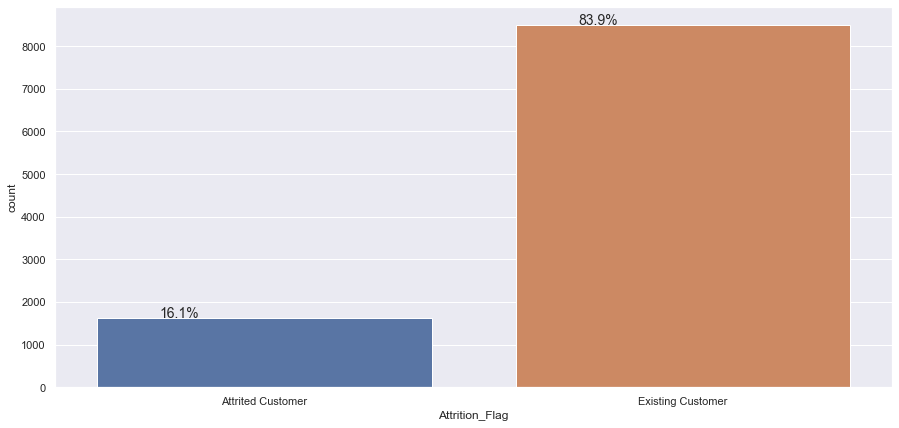

In [323]:
perc_on_bar(df['Attrition_Flag'])

16.1% of the customers are attrited customers and remaining 83.9% customers are existing customers.

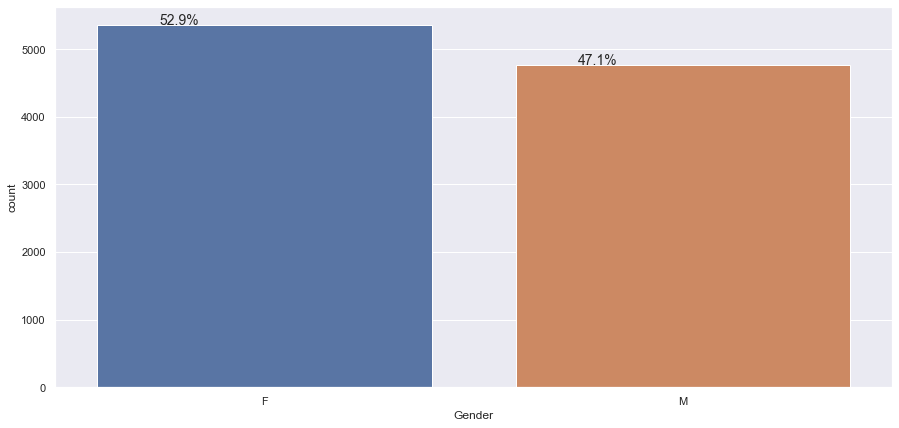

In [324]:
perc_on_bar(df['Gender'])

52.9% of the customers are Female and 47.1% of them are male.

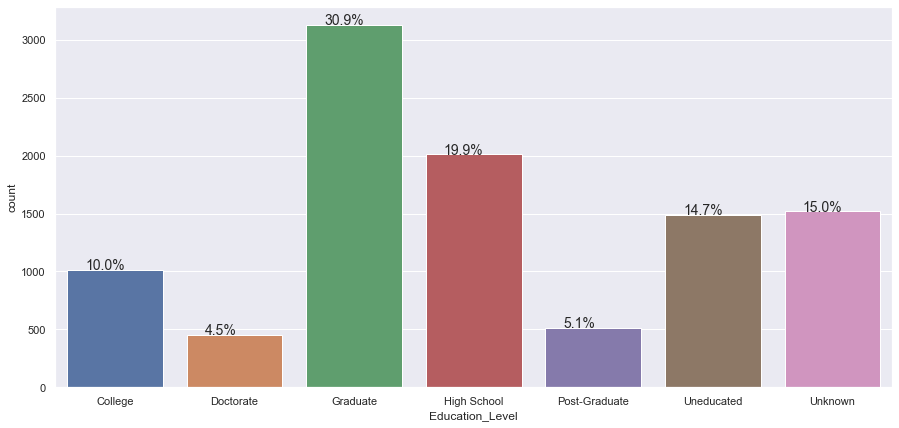

In [325]:
perc_on_bar(df['Education_Level'])

15% of the observations don't have an education level. I will impute these values later in this notebook. Majority of the customers are Graduate followed by high school leveland and around 10% of them are post graduate or doctorate level. 

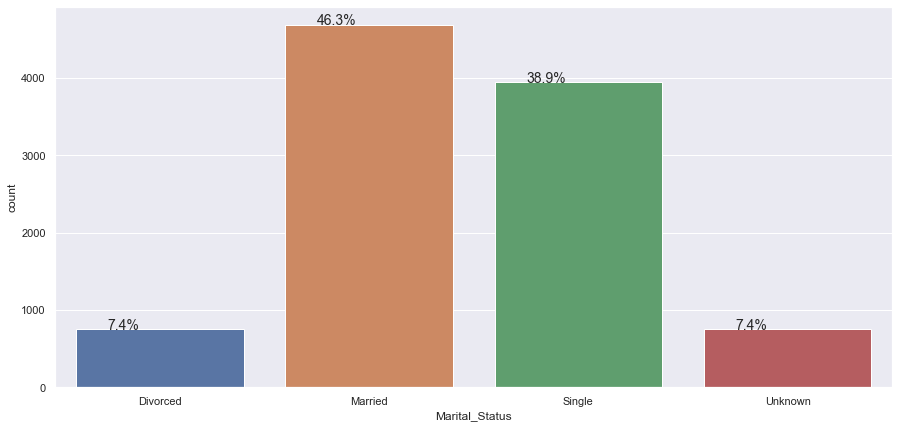

In [326]:
perc_on_bar(df['Marital_Status'])

Majority of them are married followed by single status. There are about 7.4% of observations don't have marital status. I am planning to keep them as is and the reasoning for this is most of the times in real world scenarios, many of them don't want to reveal their marital status. 

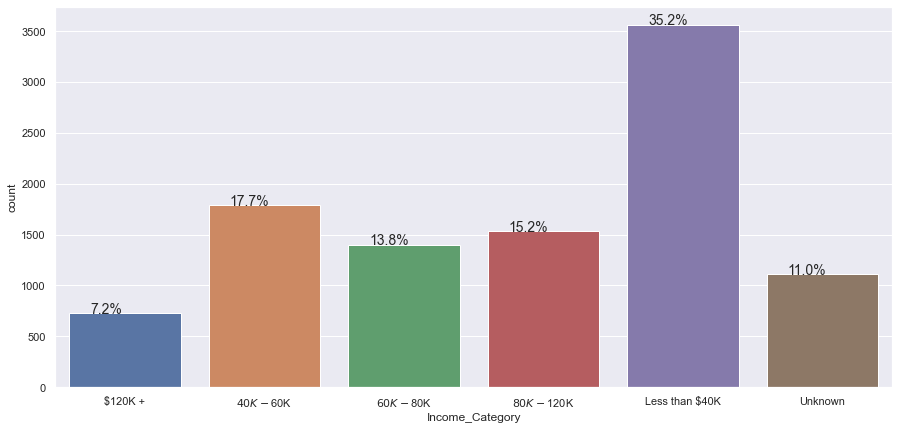

In [327]:
perc_on_bar(df['Income_Category'])

Monthly income is less than 40K for 35.2% of the population followed by 40K-60K, 13.8% of observations are earning between 60K-80K. There is about 11% of the population don't have income and I am planning to keep them as is since in real world not everyone wants to reveal their income.

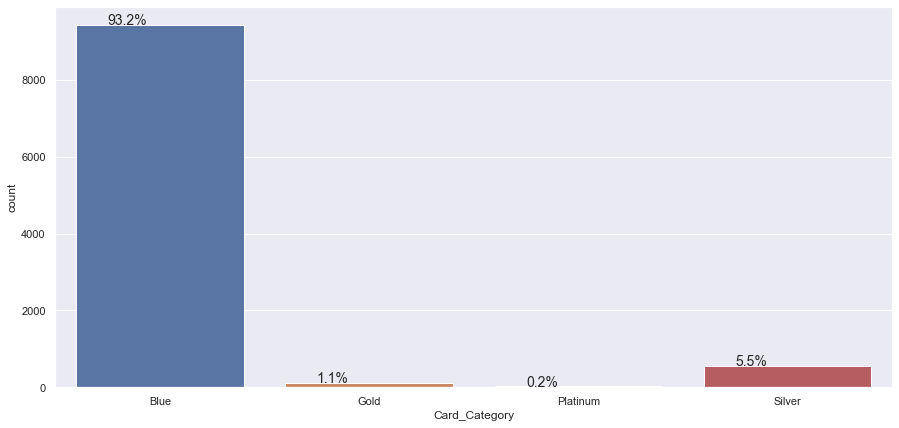

In [328]:
perc_on_bar(df['Card_Category'])

93.2% of them have a blue card followed by 5.5% of population having Silver and a very low 1.3% of them have either Gold or Platinum cards.

## <a id = "link4"></a> Bivariate Analysis

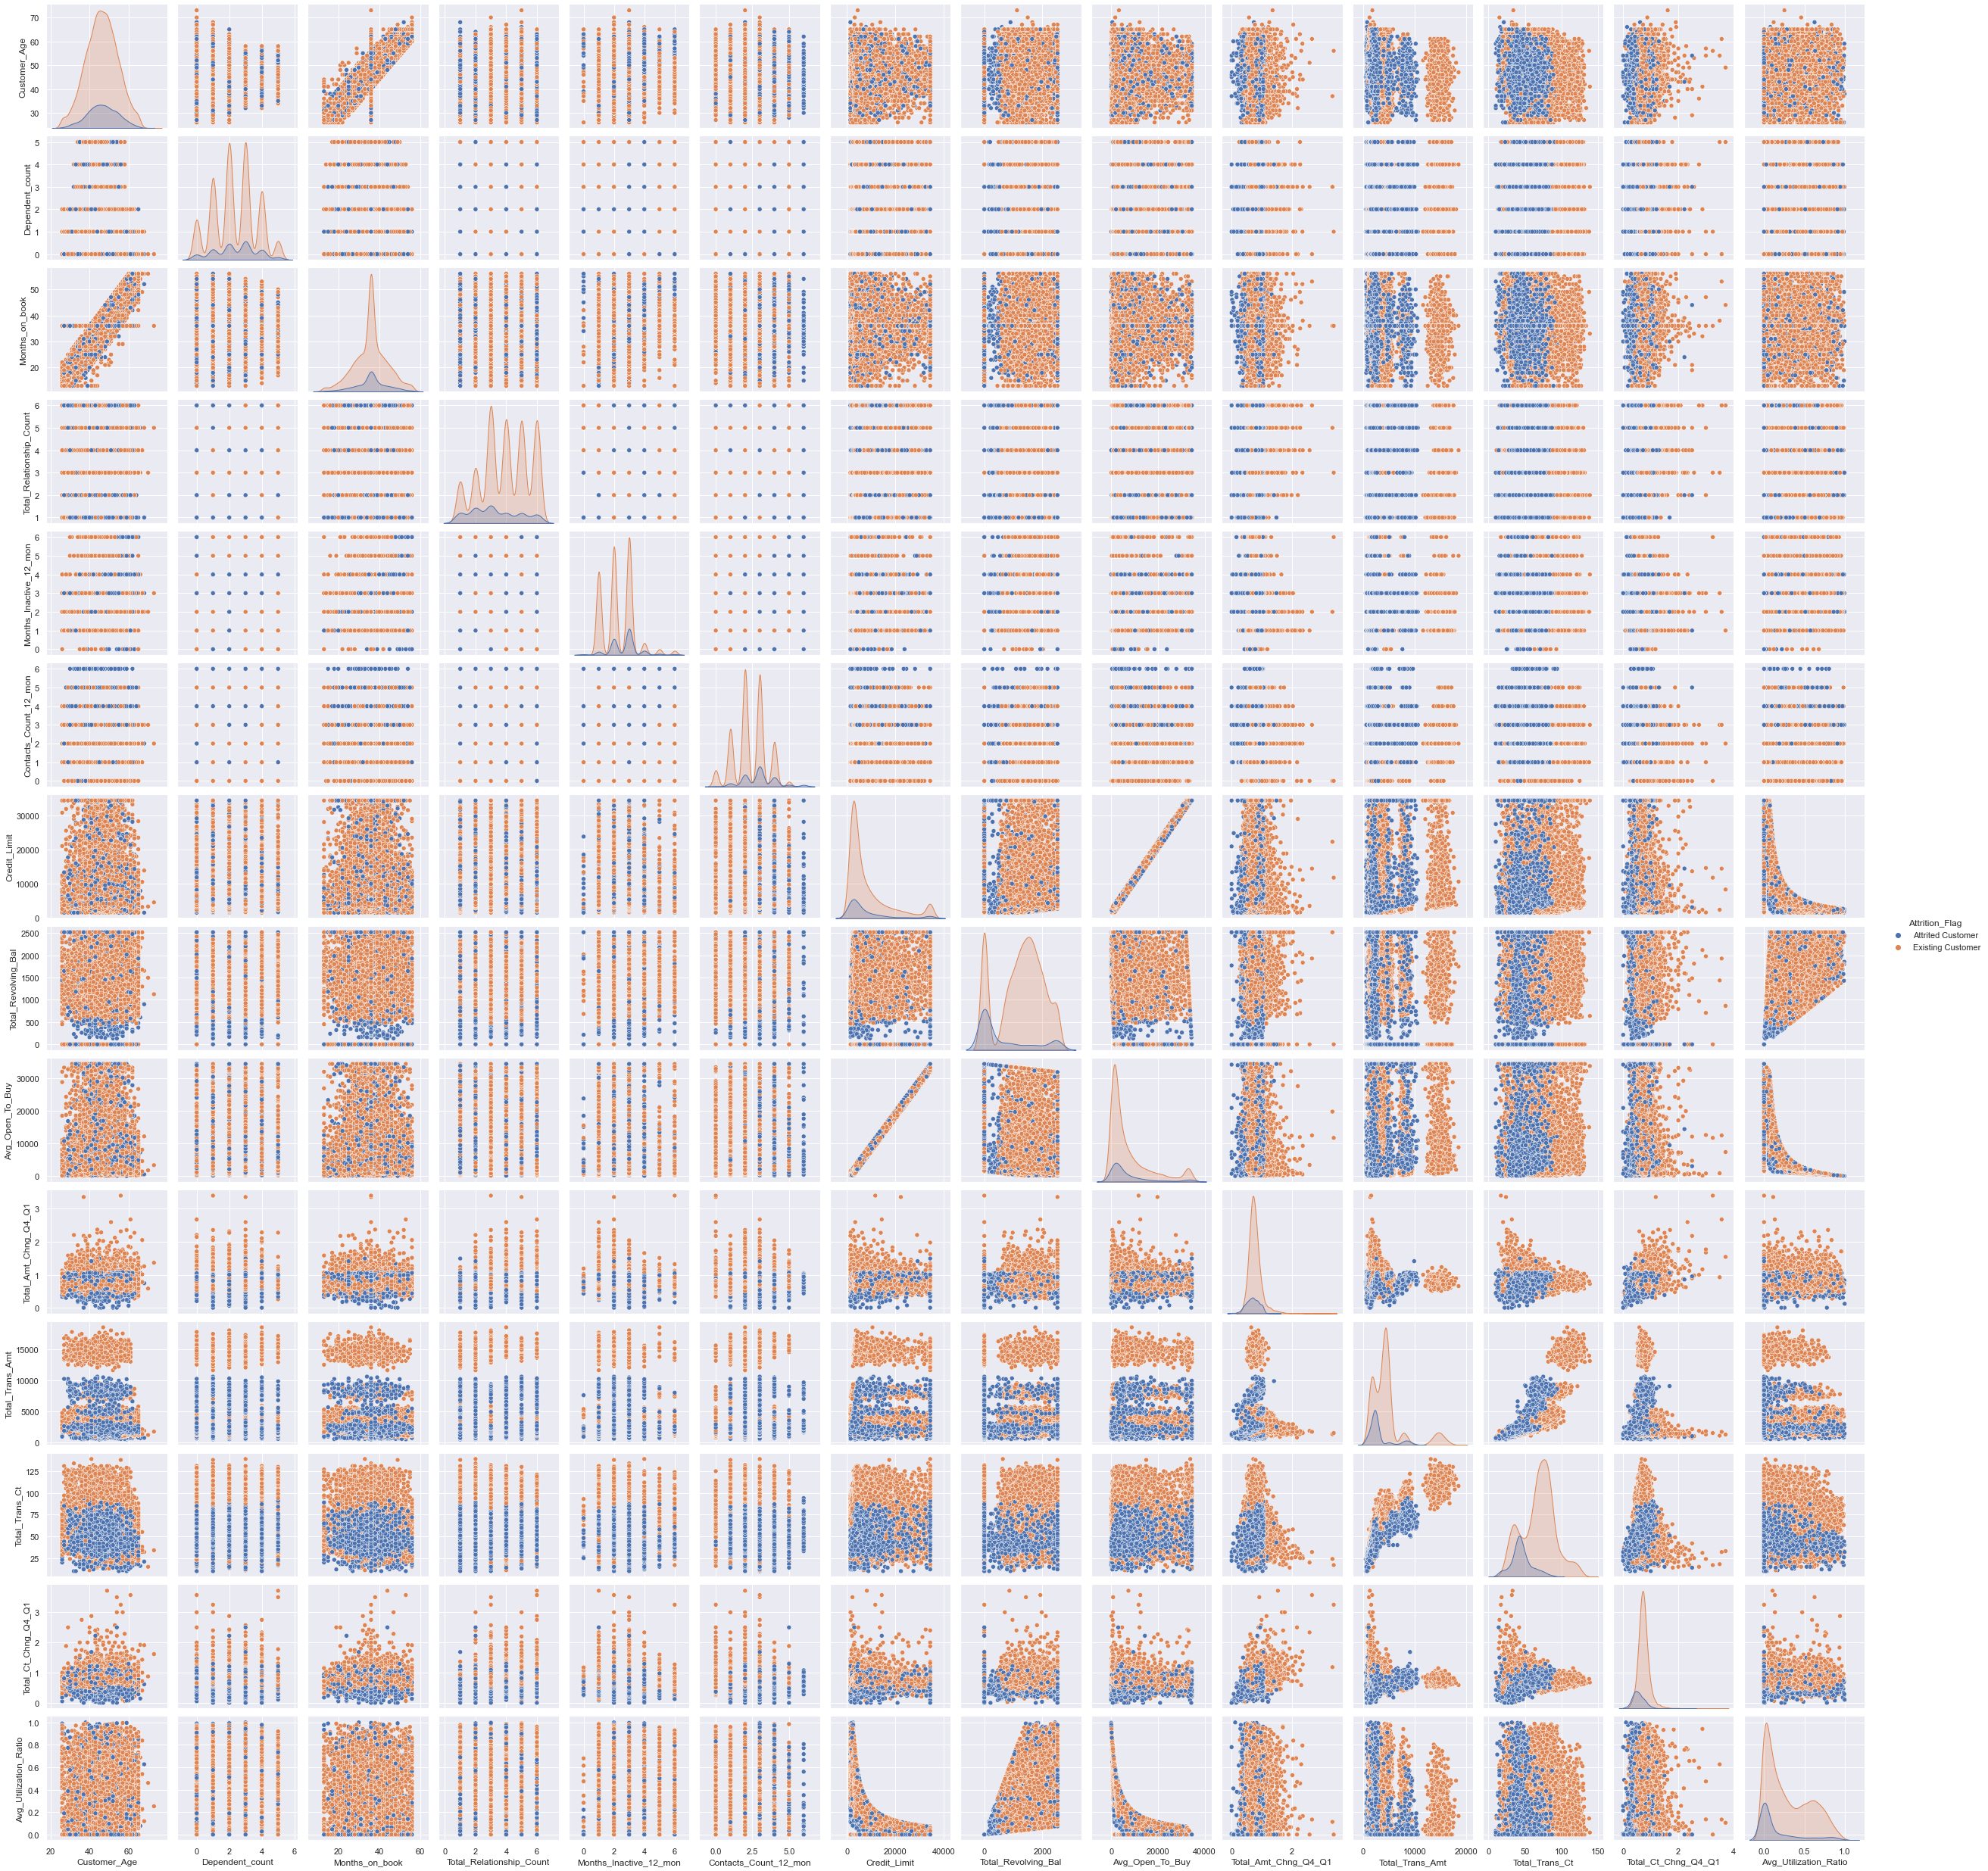

In [329]:
sns.pairplot(data=df,hue='Attrition_Flag')

Since there is no clear distinction and there are large number of variables, I will use other charts to explore the bivariate relationship.

In [330]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x,flag=True):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['Attrition_Flag'],margins=True)
    if flag==True:
        print(tab1)
        print('-'*120)
    tab = pd.crosstab(x,df['Attrition_Flag'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### Attrition Vs Gender

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


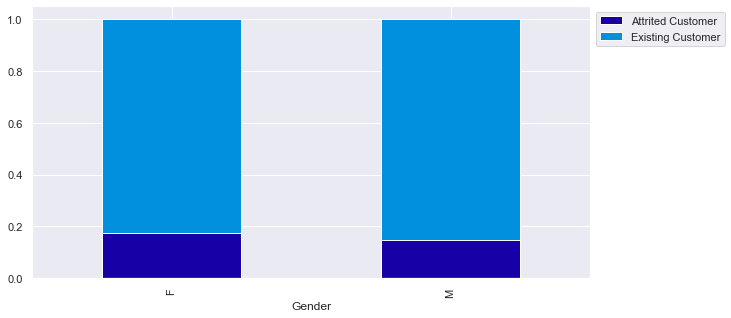

In [331]:
stacked_plot(df.Gender)

* Of the 1627 customers who attrited, majority of them are Female. However, this is not definite as the male customers who attrited are also high.

Attrition_Flag  Attrited Customer  Existing Customer    All
Customer_Age                                               
26                              6                 72     78
27                              3                 29     32
28                              1                 28     29
29                              7                 49     56
30                             15                 55     70
31                             13                 78     91
32                             17                 89    106
33                             20                107    127
34                             19                127    146
35                             21                163    184
36                             24                197    221
37                             37                223    260
38                             47                256    303
39                             48                285    333
40                             64       

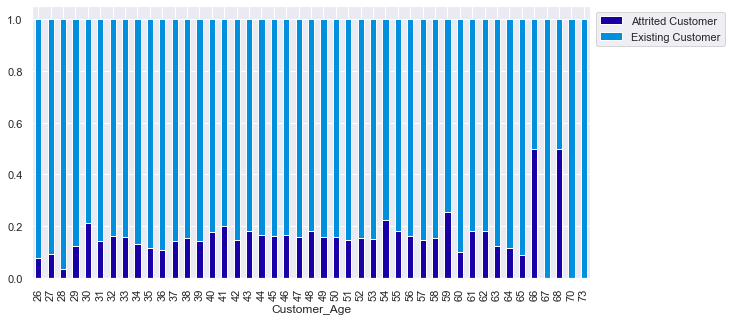

In [332]:
stacked_plot(df.Customer_Age)

* Of the attrited customers, from the above graph, I can see that ages 66, 68, 59,54,48,43,41,30 are high. However, this is inconclusive so I will have to drill this further.

In [333]:
df['Customer_Age'].value_counts()

44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
60    127
33    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
73      1
70      1
Name: Customer_Age, dtype: int64

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
0                              135                769    904
1                              269               1569   1838
2                              417               2238   2655
3                              482               2250   2732
4                              260               1314   1574
5                               64                360    424
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


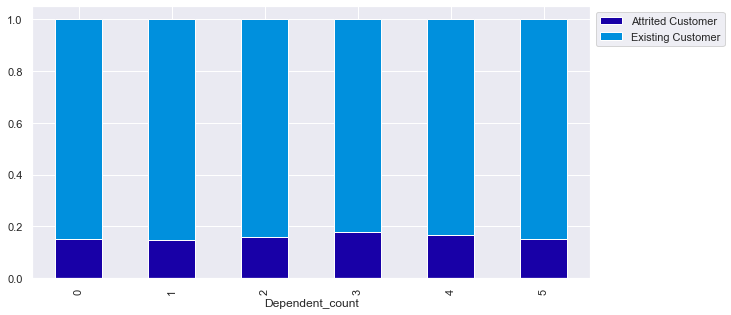

In [334]:
stacked_plot(df.Dependent_count)

* Looks like if the dependent count is 3, there are more attrited customers.

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


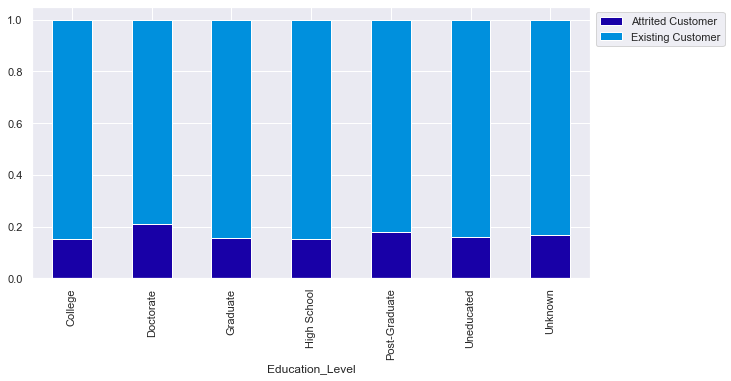

In [335]:
stacked_plot(df.Education_Level)

* From the graph above, I can see that Doctorate has high attrition among that group followed by Post Graduate.

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


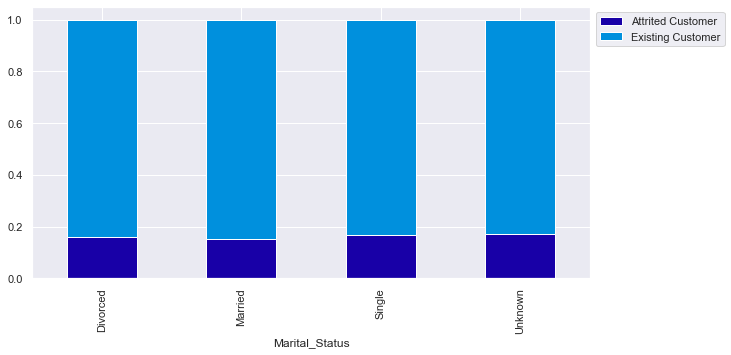

In [336]:
stacked_plot(df.Marital_Status)

* I cannot deduce if marital status contributes to attrition from the graph above. However, I will use this variable in the model to see if it impacts.

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


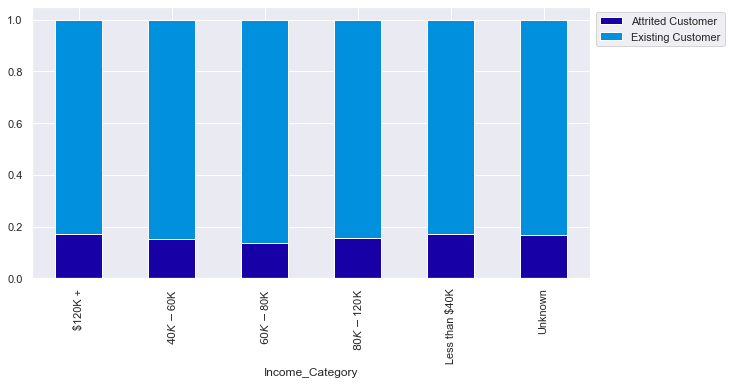

In [337]:
stacked_plot(df.Income_Category)

* Looks like attrition is higher among less than 40K income category followed by 40K-60K category.

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


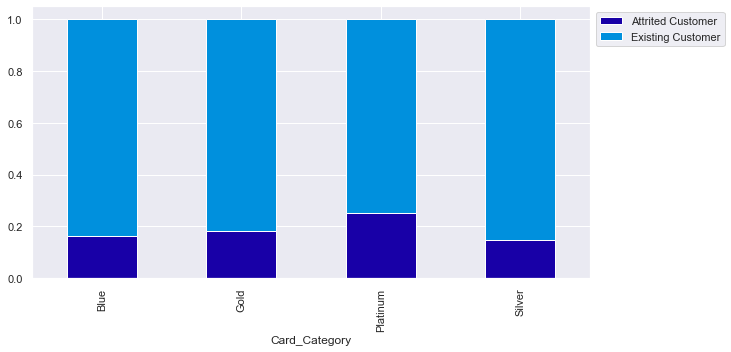

In [338]:
stacked_plot(df.Card_Category)

* Looks like Attrition is more among Platinum customers followed by Gold category customers. The graph could be misleading if you look at the cross tab since there are more attrited customers in Blue card category followed by Silver. However, if you look at the total number of customers within platinum and gold they are very less compared to Blue and Silver category.

<AxesSubplot:xlabel='Months_on_book', ylabel='Attrition_Flag'>

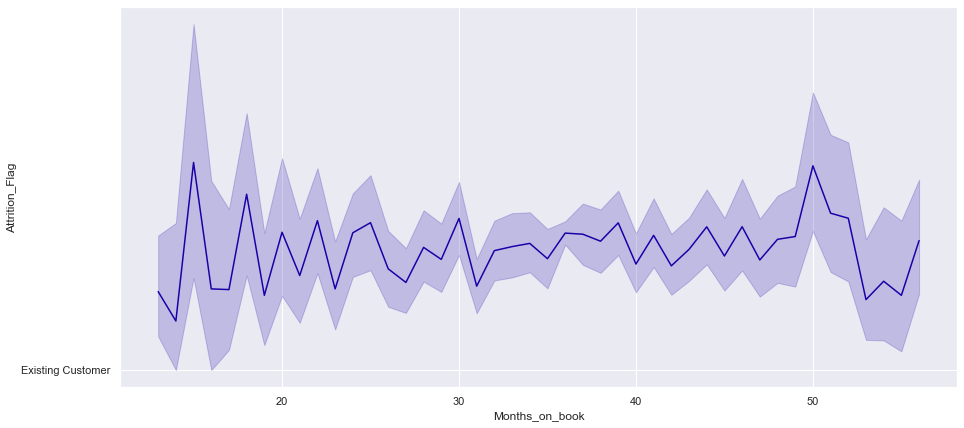

In [339]:
sns.lineplot(x='Months_on_book',y='Attrition_Flag',data=df)

* Looks like as the months on book is around 48-50, attrition seems to be high followed by less than 20.

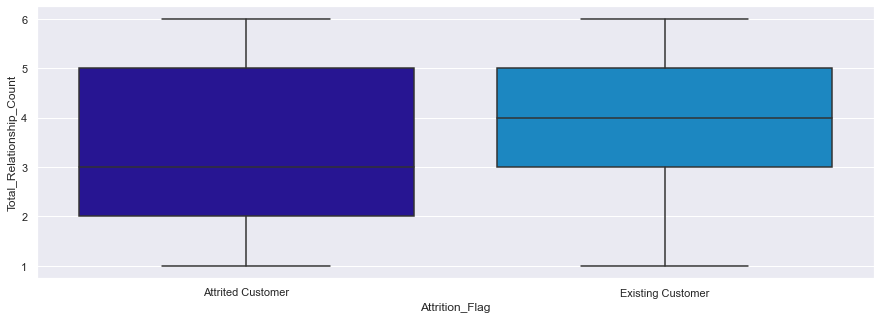

In [340]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Total_Relationship_Count',x='Attrition_Flag',data=df)
plt.show()

* Looks like total products between 2-5 attrition is more compared to 1 or 6 products.

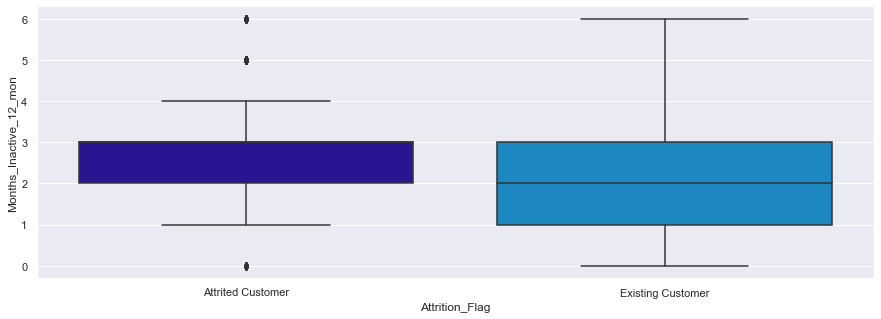

In [341]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Months_Inactive_12_mon',x='Attrition_Flag',data=df)
plt.show()

* Looks like if the customers are inactive between 2-3 in the last 12 months attrition is more.

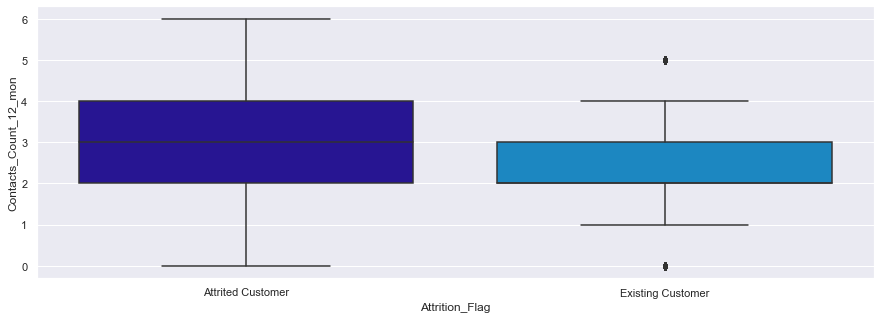

In [342]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Contacts_Count_12_mon',x='Attrition_Flag',data=df)
plt.show()

* Attrition seems to be more for contacts between 2-4 times,

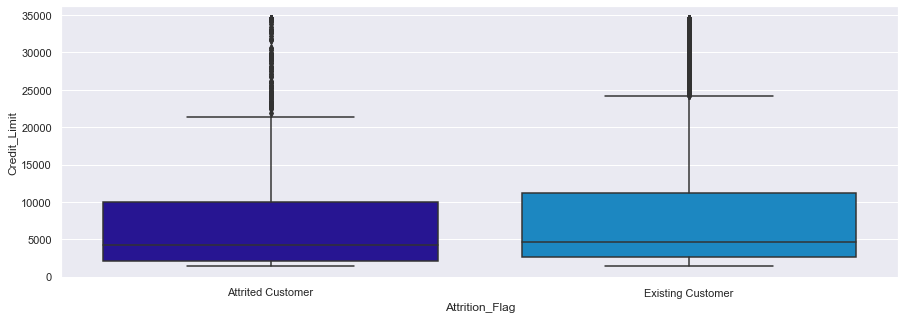

In [343]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Credit_Limit',x='Attrition_Flag',data=df)
plt.show()

* Looks like credit limit below 10K seems to have more attritted customers.

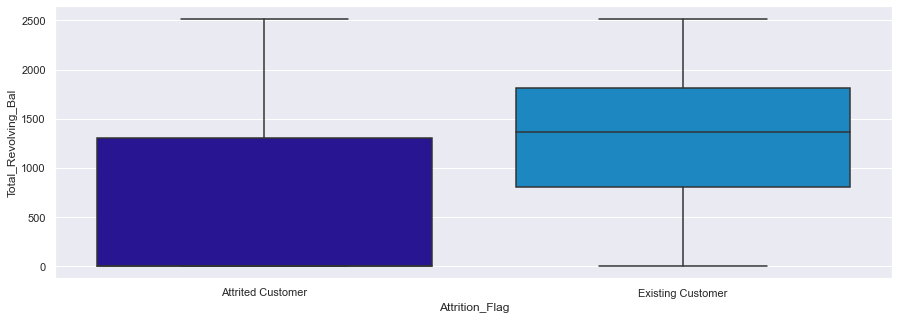

In [344]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Total_Revolving_Bal',x='Attrition_Flag',data=df)
plt.show()

* For Attrited customers, the total revolving balance is below 1500.

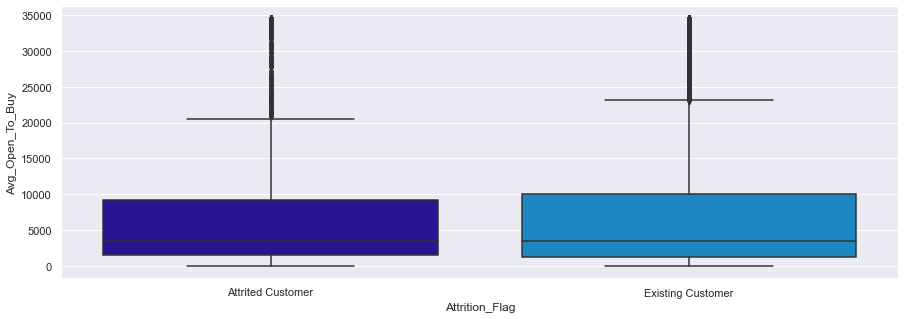

In [345]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Avg_Open_To_Buy',x='Attrition_Flag',data=df)
plt.show()

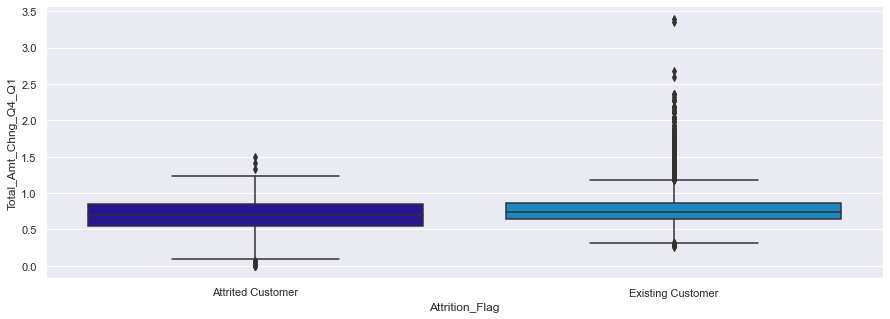

In [346]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Total_Amt_Chng_Q4_Q1',x='Attrition_Flag',data=df)
plt.show()

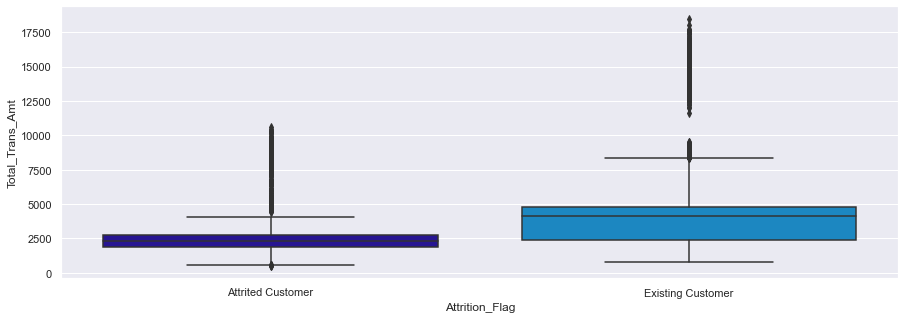

In [347]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Total_Trans_Amt',x='Attrition_Flag',data=df)
plt.show()

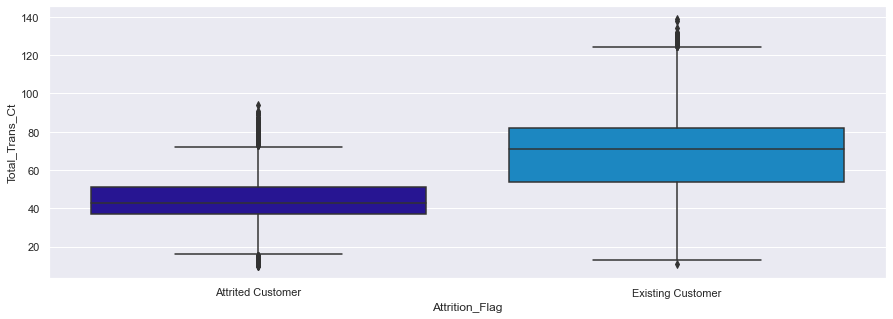

In [348]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Total_Trans_Ct',x='Attrition_Flag',data=df)
plt.show()

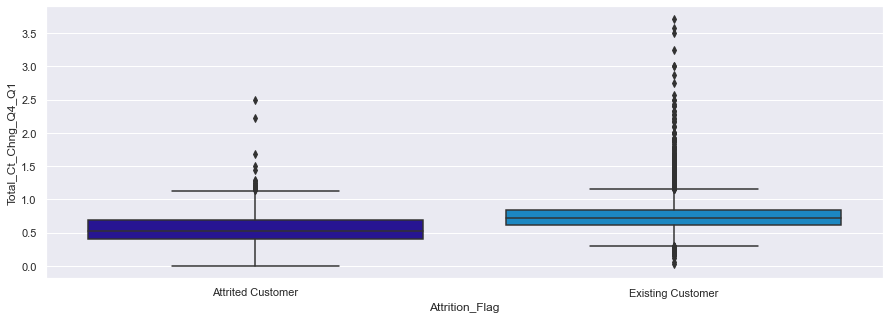

In [349]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Total_Ct_Chng_Q4_Q1',x='Attrition_Flag',data=df)
plt.show()

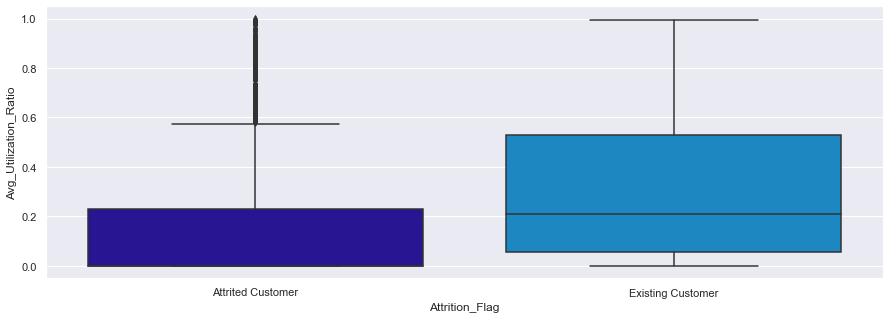

In [350]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Avg_Utilization_Ratio',x='Attrition_Flag',data=df)
plt.show()

## <a id = "link5"></a> Correlation Heatmap

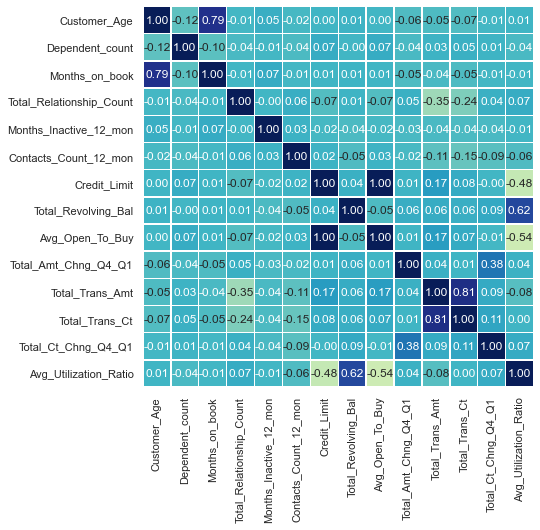

In [351]:
sns.set(rc={'figure.figsize':(7,7)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu",
            fmt='0.2f')
plt.show()

## <a id = "link6"></a> Data Pre-Processing

In [352]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   
5  Existing Customer            44      M                2        Graduate   
6  Existing Customer            51      M                4         Unknown   
7  Existing Customer            32      M                0     High School   
8  Existing Customer            37      M                3      Uneducated   
9  Existing Customer            48      M                2        Graduate   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   
5        Married     $40K - $60K          Blue              36   
6        Married         $120K +          Gold              46   
7        Unknown     $60K - $80K        Silver              27   
8         Single     $60K - $80K          Blue              36   
9         Single    $80K - $120K          Blue              36   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   
5                         3                       1                      2   
6                         6                       1                      3   
7                         2                       2                      2   
8                         5                       2                      0   
9                         6                       3                      3   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   
5        4010.0                 1247           2763.0                 1.376   
6       34516.0                 2264          32252.0                 1.975   
7       29081.0                 1396          27685.0                 2.204   
8       22352.0                 2517          19835.0                 3.355   
9       11656.0                 1677           9979.0                 1.524   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  
5             1088              24                0.846                  0.311  
6             1330              31                0.722                  0.066  
7             1538              36         

In [362]:
#Encoding nominal variables
replaceStruct = {
                "Attrition_Flag": {"Existing Customer": 0, "Attrited Customer": 1},
                "Gender": {"M": 1, "F":0},
                "Education_Level": {"Doctorate":6,"Post-Graduate":5,"Graduate":4,"College":3,"High School":2,"Uneducated":1,"Unknown":0},
                "Occupation": {"Salaried": 4, "Large Business":3 , "Small Business": 2, "Free Lancer": 1},
                "Marital_Status": {"Married": 3, "Divorced":2 , "Single": 1, "Unknown": 0},
                "Income_Category": {"$120K +":5,"$80K - $120K":4,"$60K - $80K":3,"$40K - $60K":2,"Less than $40K":1,"Unknown":0},
                "Card_Category": {"Platinum":3,"Gold":2,"Silver":1,"Blue":0}

                    }


In [363]:
df=df.replace(replaceStruct)

In [364]:
df.head()

CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0  768805383               0            45       1                3   
1  818770008               0            49       0                5   
2  713982108               0            51       1                3   
3  769911858               0            40       0                4   
4  709106358               0            40       1                3   

   Education_Level  Marital_Status  Income_Category  Card_Category  \
0                2               3                3              0   
1                4               1                1              0   
2                4               3                4              0   
3                2               0                1              0   
4                1               3                3              0   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [365]:
#Removing CLIENTNUM from the dataset
df.drop(['CLIENTNUM'], axis = 1, inplace = True)
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [366]:
df.describe().T

count         mean          std     min       25%  \
Attrition_Flag            10127.0     0.160660     0.367235     0.0     0.000   
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Gender                    10127.0     0.470919     0.499178     0.0     0.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Education_Level           10127.0     2.601955     1.700417     0.0     1.000   
Marital_Status            10127.0     1.925546     1.068920     0.0     1.000   
Income_Category           10127.0     2.085711     1.474639     0.0     1.000   
Card_Category             10127.0     0.083638     0.333784     0.0     0.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Attrition_Flag               0.000      0.000      1.000  
Customer_Age                46.000     52.000     73.000  
Gender                       0.000      1.000      1.000  
Dependent_count              2.000      3.000      5.000  
Education_Level              3.000      4.000      6.000  
Marital_Status               2.000      3.000      3.000  
Income_Category              2.000      3.000      5.000  
Card_Category                0.000      0.000      3.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

## <a id = "link7"></a> Outlier Treatment

To Summarize, following variables need to be treatment for outliers:

- Customer_Age
 * Outliers > (Q3 + 1.5 * IQR): 68.5
 
- Months_on_book
 * Outliers <(Q1 - 1.5 * IQR)  17.5
 * Outliers > (Q3 + 1.5 * IQR): 53.5

- Months_Inactive_12_mon
 * Outliers <(Q1 - 1.5 * IQR)  0.5
 * Outliers > (Q3 + 1.5 * IQR): 4.5 
 
- Contacts_Count_12_mon
 * Outliers <(Q1 - 1.5 * IQR)  0.5
 * Outliers > (Q3 + 1.5 * IQR): 4.5
 
- Credit_Limit
 * Outliers > (Q3 + 1.5 * IQR): 23836.25
 
- Avg_Open_To_Buy
 * Outliers > (Q3 + 1.5 * IQR): 22660.75
 
- Total_Amt_Chng_Q4_Q1
 * Outliers <(Q1 - 1.5 * IQR)  0.28899999999999987
 * Outliers > (Q3 + 1.5 * IQR): 1.2010000000000003

- Total_Trans_Amt
  * Outliers > (Q3 + 1.5 * IQR): 8619.25

- Total_Trans_Ct
  * Outliers > (Q3 + 1.5 * IQR): 135.0

- Total_Ct_Chng_Q4_Q1
  * Outliers <(Q1 - 1.5 * IQR)  0.22800000000000026
  * Outliers > (Q3 + 1.5 * IQR): 1.1719999999999997

- Avg_Utilization_Ratio
  * Outliers > (Q3 + 1.5 * IQR): 1.2229999999999999



In [367]:
df.describe().T

count         mean          std     min       25%  \
Attrition_Flag            10127.0     0.160660     0.367235     0.0     0.000   
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Gender                    10127.0     0.470919     0.499178     0.0     0.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Education_Level           10127.0     2.601955     1.700417     0.0     1.000   
Marital_Status            10127.0     1.925546     1.068920     0.0     1.000   
Income_Category           10127.0     2.085711     1.474639     0.0     1.000   
Card_Category             10127.0     0.083638     0.333784     0.0     0.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Attrition_Flag               0.000      0.000      1.000  
Customer_Age                46.000     52.000     73.000  
Gender                       0.000      1.000      1.000  
Dependent_count              2.000      3.000      5.000  
Education_Level              3.000      4.000      6.000  
Marital_Status               2.000      3.000      3.000  
Income_Category              2.000      3.000      5.000  
Card_Category                0.000      0.000      3.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

In [368]:
#Outlier Treatment

df['Customer_Age'] = np.where(df['Customer_Age']>68.5, df['Customer_Age'].median(), df['Customer_Age'])

df['Months_on_book'] = np.where(df['Months_on_book']<17.5, df['Months_on_book'].median(), df['Months_on_book'])
df['Months_on_book'] = np.where(df['Months_on_book']>53.5, df['Months_on_book'].median(), df['Months_on_book'])

df['Months_Inactive_12_mon'] = np.where(df['Months_Inactive_12_mon']<0.5, df['Months_Inactive_12_mon'].median(), df['Months_Inactive_12_mon'])
df['Months_Inactive_12_mon'] = np.where(df['Months_Inactive_12_mon']>4.5, df['Months_Inactive_12_mon'].median(), df['Months_Inactive_12_mon'])

df['Contacts_Count_12_mon'] = np.where(df['Contacts_Count_12_mon']<0.5, df['Contacts_Count_12_mon'].median(), df['Contacts_Count_12_mon'])
df['Contacts_Count_12_mon'] = np.where(df['Contacts_Count_12_mon']>4.5, df['Contacts_Count_12_mon'].median(), df['Contacts_Count_12_mon'])


df['Credit_Limit'] = np.where(df['Credit_Limit']>23836.25, df['Credit_Limit'].median(), df['Credit_Limit'])

df['Avg_Open_To_Buy'] = np.where(df['Avg_Open_To_Buy']>22660.75, df['Avg_Open_To_Buy'].median(), df['Avg_Open_To_Buy'])

df['Total_Amt_Chng_Q4_Q1'] = np.where(df['Total_Amt_Chng_Q4_Q1']<0.28899999999999987, df['Total_Amt_Chng_Q4_Q1'].median(), df['Total_Amt_Chng_Q4_Q1'])
df['Total_Amt_Chng_Q4_Q1'] = np.where(df['Total_Amt_Chng_Q4_Q1']>1.2010000000000003, df['Total_Amt_Chng_Q4_Q1'].median(), df['Total_Amt_Chng_Q4_Q1'])


df['Total_Trans_Amt'] = np.where(df['Total_Trans_Amt']>8619.25, df['Total_Trans_Amt'].median(), df['Total_Trans_Amt'])

df['Total_Trans_Ct'] = np.where(df['Total_Trans_Ct']>135.0, df['Total_Trans_Ct'].median(), df['Total_Trans_Ct'])


df['Total_Ct_Chng_Q4_Q1'] = np.where(df['Total_Ct_Chng_Q4_Q1']<0.22800000000000026, df['Total_Ct_Chng_Q4_Q1'].median(), df['Total_Ct_Chng_Q4_Q1'])
df['Total_Ct_Chng_Q4_Q1'] = np.where(df['Total_Ct_Chng_Q4_Q1']>1.1719999999999997, df['Total_Ct_Chng_Q4_Q1'].median(), df['Total_Ct_Chng_Q4_Q1'])


df['Avg_Utilization_Ratio'] = np.where(df['Avg_Utilization_Ratio']>1.2229999999999999, df['Avg_Utilization_Ratio'].median(), df['Avg_Utilization_Ratio'])



In [369]:
df.describe().T

count         mean          std       min  \
Attrition_Flag            10127.0     0.160660     0.367235     0.000   
Customer_Age              10127.0    46.320924     8.008976    26.000   
Gender                    10127.0     0.470919     0.499178     0.000   
Dependent_count           10127.0     2.346203     1.298908     0.000   
Education_Level           10127.0     2.601955     1.700417     0.000   
Marital_Status            10127.0     1.925546     1.068920     0.000   
Income_Category           10127.0     2.085711     1.474639     0.000   
Card_Category             10127.0     0.083638     0.333784     0.000   
Months_on_book            10127.0    35.946677     6.934324    18.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.000   
Months_Inactive_12_mon    10127.0     2.245186     0.843830     1.000   
Contacts_Count_12_mon     10127.0     2.460650     0.905252     1.000   
Credit_Limit              10127.0  6008.244604  4991.965934  1438.300   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.000   
Avg_Open_To_Buy           10127.0  4896.163533  5068.415352     3.000   
Total_Amt_Chng_Q4_Q1      10127.0     0.737483     0.161034     0.289   
Total_Trans_Amt           10127.0  3530.719068  1602.932506   510.000   
Total_Trans_Ct            10127.0    64.844574    23.449757    10.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.694054     0.173648     0.231   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.000   

                               25%       50%       75%        max  
Attrition_Flag               0.000     0.000     0.000      1.000  
Customer_Age                41.000    46.000    52.000     68.000  
Gender                       0.000     0.000     1.000      1.000  
Dependent_count              1.000     2.000     3.000      5.000  
Education_Level              1.000     3.000     4.000      6.000  
Marital_Status               1.000     2.000     3.000      3.000  
Income_Category              1.000     2.000     3.000      5.000  
Card_Category                0.000     0.000     0.000      3.000  
Months_on_book              32.000    36.000    40.000     53.000  
Total_Relationship_Count     3.000     4.000     5.000      6.000  
Months_Inactive_12_mon       2.000     2.000     3.000      4.000  
Contacts_Count_12_mon        2.000     2.000     3.000      4.000  
Credit_Limit              2555.000  4549.000  7641.500  23760.000  
Total_Revolving_Bal        359.000  1276.000  1784.000   2517.000  
Avg_Open_To_Buy           1324.500  3474.000  6547.000  22616.000  
Total_Amt_Chng_Q4_Q1         0.633     0.736     0.840      1.201  
Total_Trans_Amt           2155.500  3899.000  4458.500   8618.000  
Total_Trans_Ct              45.000    67.000    81.000    134.000  
Total_Ct_Chng_Q4_Q1          0.588     0.702     0.800      1.171  
Avg_Utilization_Ratio        0.023     0.176     0.503      0.999

* After using median to substitute outliers, the mean and other metrics didn't change drastically.

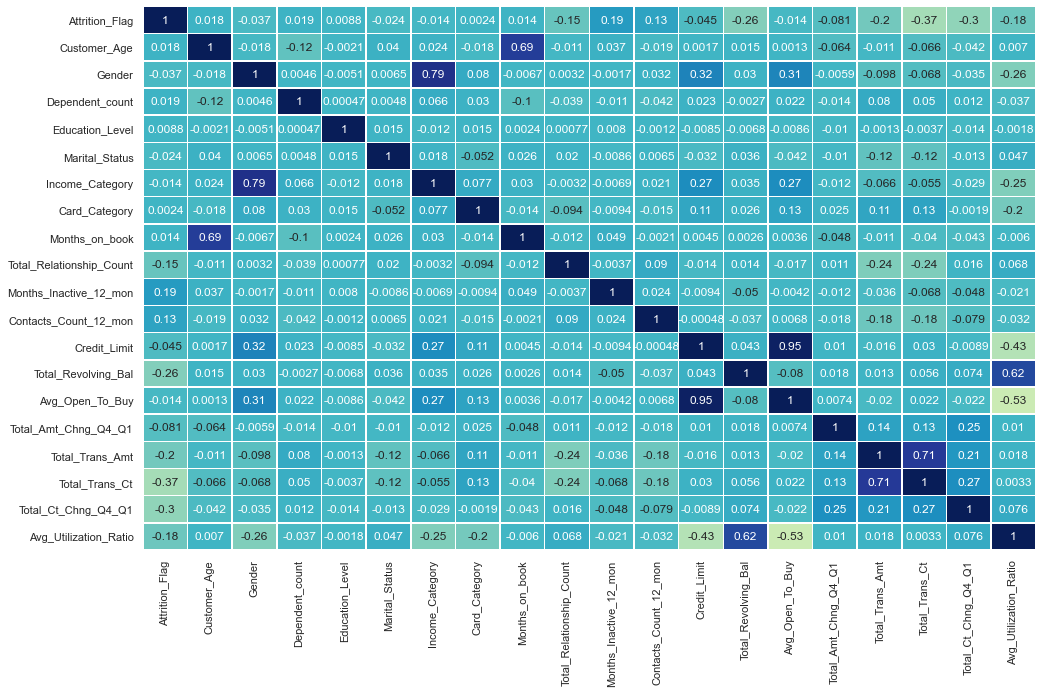

In [370]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

- Income Category and Gender are positively correlated.
- Months on Book and Customer age are positively correlated.
- Total revolving blaance and avg utilization are positively correlated
- Total trans amt and total trans ct are positively correlated. I think including both trans amt and trans ct will lead to multi-collinearity so I might drop the trans ct. 
- Avg open to buy and credit limit are highly correlated (0.95)

## <a id = "link8"></a> Model Building - Approach
1. Partition the data into train and test set.
2. Treat missing values using KNNImputer
3. Built different classifiers using K-Fold cross validation, pipelines and StandardScaler.
4. Hyperparameter tuning the model which gives the best cross validation score 
6. Build the model using optimal hyperparameters and test the performance on the test set.

## <a id = "link9"></a>  Model evaluation criterion

- We will be using Recall as a metric for our model performance.
- We will maximize recall i.e. we need reduce the number of false negatives/

## <a id = "link10"></a> Split the dataset

In [417]:
#Separating target variable and other variables
X=df.drop(columns='Attrition_Flag')
Y=df['Attrition_Flag']

In [418]:
#Dropping Total_Trans_Ct as it is highly correlated with total transaction amount
X.drop(columns=['Total_Trans_Ct'],inplace=True)

In [419]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)
print(X_train.shape, X_test.shape)

(7088, 18) (3039, 18)


**Create dummy variables**

In [420]:
#List of columns to create a dummy variables
col_dummy=['Gender','Education_Level','Marital_Status', 'Income_Category', 'Card_Category']

In [421]:
#Encoding categorical varaibles
X_train=pd.get_dummies(X_train, columns=col_dummy, drop_first=True)
X_test=pd.get_dummies(X_test, columns=col_dummy, drop_first=True)

## <a id = "link11"></a> Building the model

## <a id = "link12"></a>  Logistics Regression

In [422]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [423]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

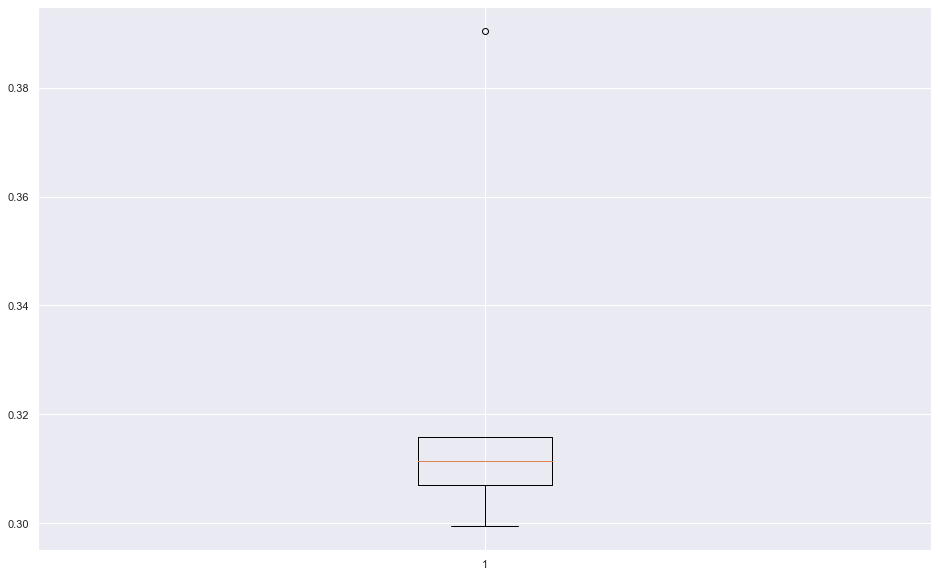

In [424]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on training set varies between 0.30 to 0.32

Accuracy on training set :  0.8795146726862303
Accuracy on test set :  0.8683777558407371
Recall on training set :  0.32484635645302895
Recall on test set :  0.2766393442622951
Precision on training set :  0.8131868131868132
Precision on test set :  0.7417582417582418


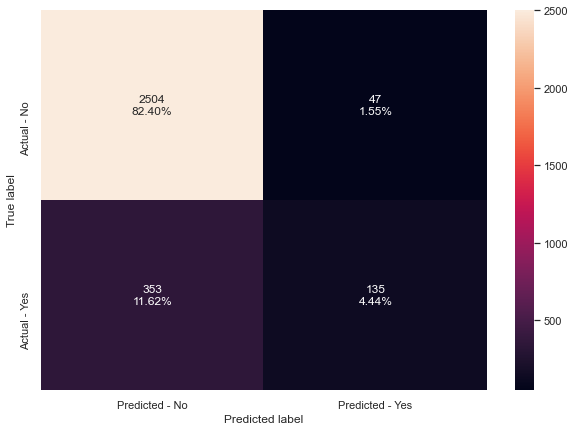

In [416]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

- Recall metrics is very low and the so we will try oversampling and undersampling.

## <a id = "link13"></a>Oversampling train data using SMOTE

In [425]:
from imblearn.over_sampling import SMOTE

In [426]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before UpSampling, counts of label '1': 1139
Before UpSampling, counts of label '0': 5949 

After UpSampling, counts of label '1': 5949
After UpSampling, counts of label '0': 5949 

After UpSampling, the shape of train_X: (11898, 31)
After UpSampling, the shape of train_y: (11898,) 



In [427]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

## <a id = "link14"></a>Evaluate model perfomance using KFold and cross_val score

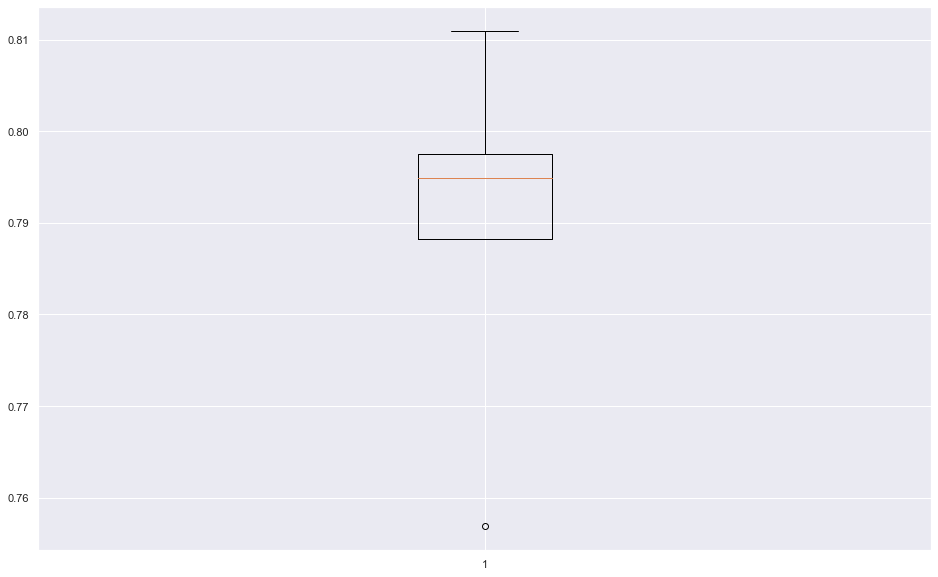

In [428]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

- Model performance improved to be between 0.78 - 0.81.

Accuracy on training set :  0.8021516221213649
Accuracy on test set :  0.7769002961500494
Recall on training set :  0.8029920995125231
Recall on test set :  0.6086065573770492
Precision on training set :  0.8016445712367847
Precision on test set :  0.3788265306122449


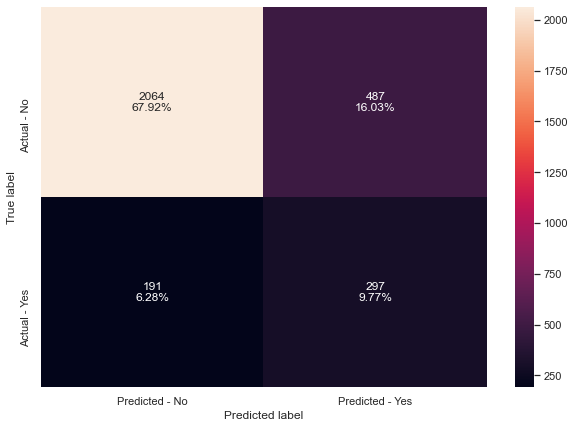

In [429]:
#Calculating different metrics
get_metrics_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

Logistic Regression has given a generalized performance on training and test set.
Recall is very also good since it is increase compared to the initial logistic model.
Let's see if regualarization/tuning can make the model performance better.

## <a id = "link15"></a>Regularization

In [430]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.7055807698772903
Accuracy on test set :  0.7472852912142152
Recall on training set :  0.6259875609346108
Recall on test set :  0.5799180327868853
Precision on training set :  0.7445021991203519
Precision on test set :  0.33451536643026003


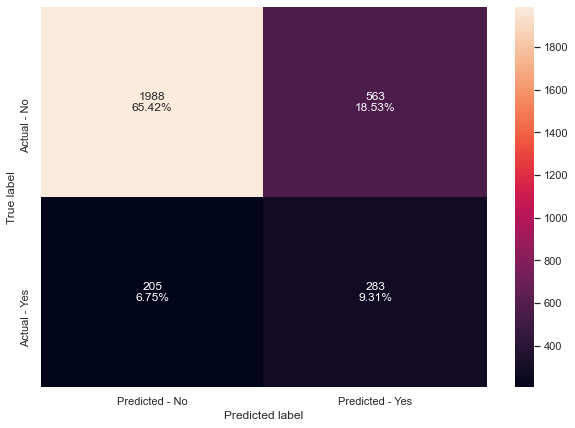

In [431]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

- Model performance is the same as previous even after regularization.

## <a id = "link16"></a> Undersampling train data using SMOTE

In [432]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [433]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1139
Before Under Sampling, counts of label 'No': 5949 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 31)
After Under Sampling, the shape of train_y: (2278,) 



## <a id = "link17"></a>Logistic Regression on undersampled data

In [434]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validator` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

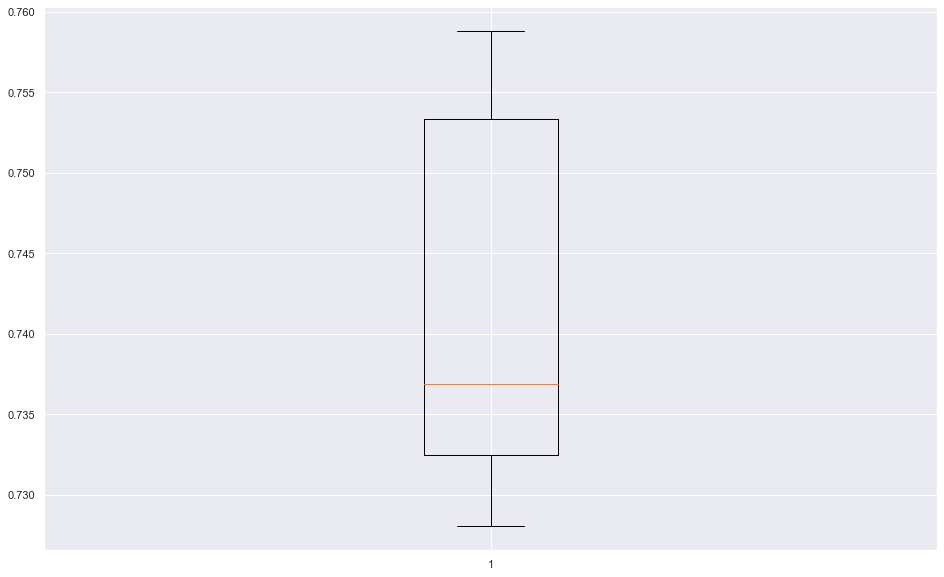

In [435]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

- Performance on model on training set varies between 0.72 to 0.76

Accuracy on training set :  0.7396839332748024
Accuracy on test set :  0.7377426785126686
Recall on training set :  0.7304653204565408
Recall on test set :  0.6598360655737705
Precision on training set :  0.7441860465116279
Precision on test set :  0.3378803777544596


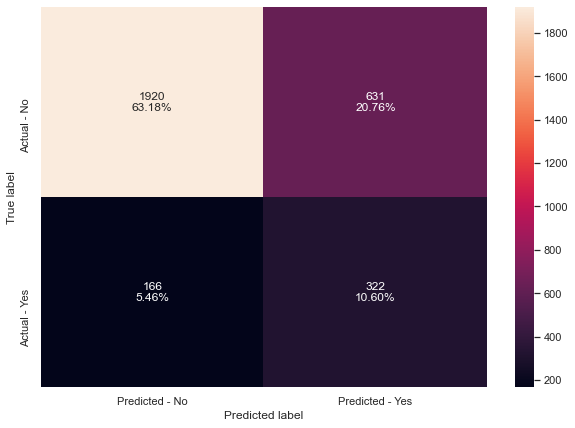

In [436]:
#Calculating different metrics
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

* Model has given a generalized performance on training and test set.
* Model performance has improved much-using downsampling.

In [438]:
# defining list of model
models = [lr]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [439]:
# defining list of models
models = [log_reg_over, lr_estimator]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [440]:
# defining list of model
models = [log_reg_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [441]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression on Oversampled data',
                                          'Logistic Regression-Regularized (Oversampled data)','Logistic Regression on Undersampled data'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame

Model  Train_Accuracy  \
0                                Logistic Regression        0.879515   
1            Logistic Regression on Oversampled data        0.802152   
2  Logistic Regression-Regularized (Oversampled d...        0.705581   
3           Logistic Regression on Undersampled data        0.739684   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0       0.868378      0.324846     0.276639         0.813187        0.741758  
1       0.776900      0.802992     0.608607         0.801645        0.378827  
2       0.747285      0.625988     0.579918         0.744502        0.334515  
3       0.737743      0.730465     0.659836         0.744186        0.337880

## <a id = "link18"></a>Model Building - Bagging & Boosting

In [443]:
%%time

models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

RF: 64.09189272741325
GBM: 73.39477548496792
ADB: 67.86382255197465
[19:25:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:25:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:25:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:25:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

## <a id = "link19"></a>Algorith Comparison

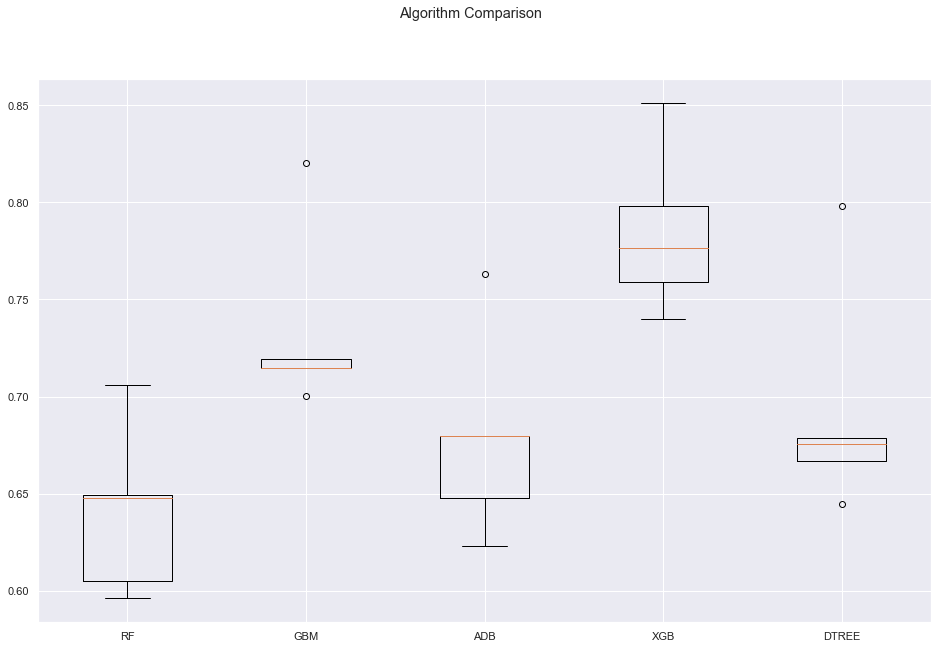

In [444]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- XGBoost is giving higher in terms of recall with 0.78 with just one outlier.
- GBM is giving the next high recall with just one outlier. 
- Decision tree is the third model with a high recall again with 2 outlier.
- We will be tuning these three models to see if the performance improves.

## <a id = "link20"></a> Hyperparameter Tuning
**We will use pipelines with StandardScaler and  AdaBoost model and tune the model using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.**

**We can also use make_pipeline function instead of Pipeline to create a pipeline.**

**`make_pipeline`: This is a shorthand for the Pipeline constructor; it does not require, and does not permit, naming the estimators. Instead, their names will be set to the lowercase of their types automatically.**

In [445]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [446]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    data_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(data_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## <a id = "link21"></a> Decision Tree


## <a id = "link22"></a> Decision Tree - GridSearchCV

In [447]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "decisiontreeclassifier__criterion": ['gini','entropy'],
    "decisiontreeclassifier__max_depth": [3, 4, 5, None],
    "decisiontreeclassifier__min_samples_split": [2,4,7,10,15]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__min_samples_split': 15} 
Score: 0.7260877965839709


In [448]:
# Creating new pipeline with best parameters
dtree_tuned1 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=1, criterion='gini', max_depth=None, min_samples_split=4),
)

# Fit the model on training data
dtree_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(min_samples_split=4, random_state=1))])

Accuracy on training set :  0.9936512415349887
Accuracy on test set :  0.9098387627509049
Recall on training set :  0.9692712906057945
Recall on test set :  0.7233606557377049
Precision on training set :  0.9910233393177738
Precision on test set :  0.717479674796748


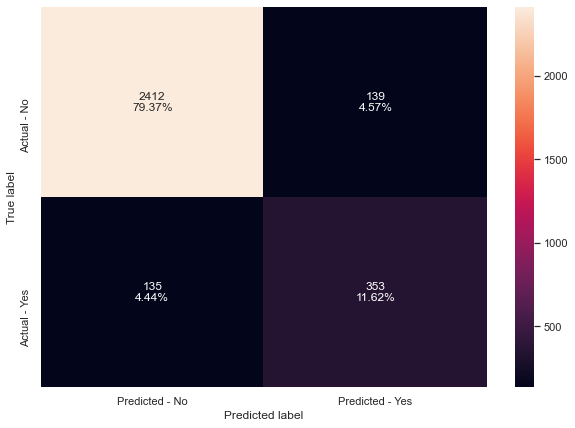

In [449]:
# Calculating different metrics
get_metrics_score(dtree_tuned1)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned1, y_test)

- Test recall on training and test varies so much indicating that the decision tree model might be overfitting the data.
- Training recall is 0.96 which indicates that it is good at identifying attrition customers, however, I am thinking it could be due to overfitting data.

## <a id = "link23"></a>Decision Tree - RandomizedSearchCV


In [450]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    
     "decisiontreeclassifier__criterion": ['gini','entropy'],
    "decisiontreeclassifier__max_depth": [3, 4, 5, None],
    "decisiontreeclassifier__min_samples_split": [2,4,7,10,15]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=20, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'decisiontreeclassifier__min_samples_split': 15, 'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__criterion': 'entropy'} with CV score=0.7260877965839709:


In [451]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    
     "decisiontreeclassifier__criterion": ['gini','entropy'],
    "decisiontreeclassifier__max_depth": [3, 4, 5, None],
    "decisiontreeclassifier__min_samples_split": [2,4,7,10,15]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=20, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'decisiontreeclassifier__min_samples_split': 15, 'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__criterion': 'entropy'} with CV score=0.7260877965839709:


In [452]:
# Creating new pipeline with best parameters
dtree_tuned2 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=1, criterion='gini', max_depth=None, min_samples_split=7),
)

# Fit the model on training data
dtree_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(min_samples_split=7, random_state=1))])

Accuracy on training set :  0.9829288939051919
Accuracy on test set :  0.9108259295820994
Recall on training set :  0.9218612818261633
Recall on test set :  0.7110655737704918
Precision on training set :  0.9704251386321626
Precision on test set :  0.7274633123689728


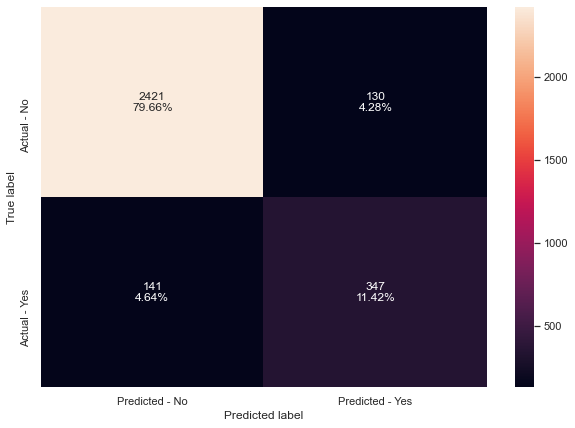

In [453]:
# Calculating different metrics
get_metrics_score(dtree_tuned2)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned2, y_test)

- Test recall has reduced slighlty compared to gridsearch
- Recall on training is 0.92 which reduced slightly when compared to the previous one.

## <a id = "link24"></a>XGBoost

## <a id = "link25"></a>XGBoost - GridSearchCV


In [454]:
# Creating pipeline
pipe = make_pipeline(
    StandardScaler(), XGBClassifier(random_state=1, eval_metric="logloss")
)

# Parameter grid to pass in GridSearchCV
param_grid = {
    "xgbclassifier__n_estimators": np.arange(50, 300, 50),
    "xgbclassifier__scale_pos_weight": [0, 1, 2, 5, 10],
    "xgbclassifier__learning_rate": [0.01, 0.1, 0.2, 0.05],
    "xgbclassifier__gamma": [0, 1, 3, 5],
    "xgbclassifier__subsample": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)


print(
    "Best parameters are {} with CV score={}:".format(
        grid_cv.best_params_, grid_cv.best_score_
    )
)

Best parameters are {'xgbclassifier__gamma': 3, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.7} with CV score=0.9148234021176288:


In [455]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=0.9,
        learning_rate=0.01,
        gamma=3,
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

[21:35:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=3, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=12, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9020880361173815
Accuracy on test set :  0.8749588680487003
Recall on training set :  0.9482001755926251
Recall on test set :  0.8954918032786885
Precision on training set :  0.6297376093294461
Precision on test set :  0.5704960835509139


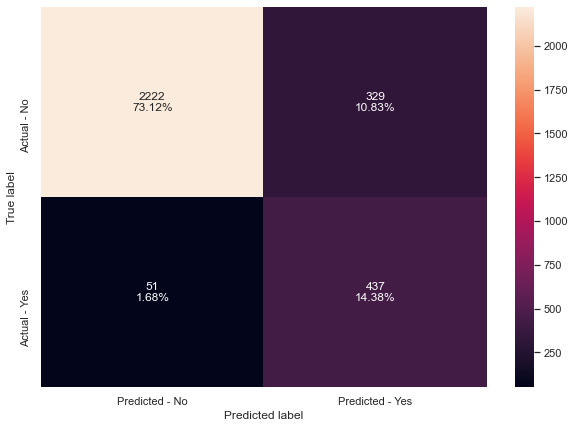

In [456]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

- The test recall has increased compared to the result from cross validation with default parameters.
- The model is overfitting the training data in terms of recall but giving generalized performance in terms of accuracy and precision.
- The model is able to identify most of the defaulters

## <a id = "link26"></a>XGBoost - RandomizedSearchCV

In [457]:
#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

[21:37:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[21:38:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:38:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:38:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:38:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[21:38:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:38:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:38:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:38:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[21:38:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:38:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:38:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:38:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[21:38:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:38:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:38:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:38:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[21:38:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:38:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:38:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:39:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[21:39:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:39:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:39:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:39:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[21:39:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:39:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:39:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:39:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [458]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=20,
                scale_pos_weight=10,
                learning_rate=0.01,
                gamma=1,
                subsample=0.9,
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

[21:42:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=1, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=20,
                               n_jobs=12, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.8852990970654627
Accuracy on test set :  0.8575189206975979
Recall on training set :  0.9508340649692713
Recall on test set :  0.8954918032786885
Precision on training set :  0.5885869565217391
Precision on test set :  0.5335775335775336


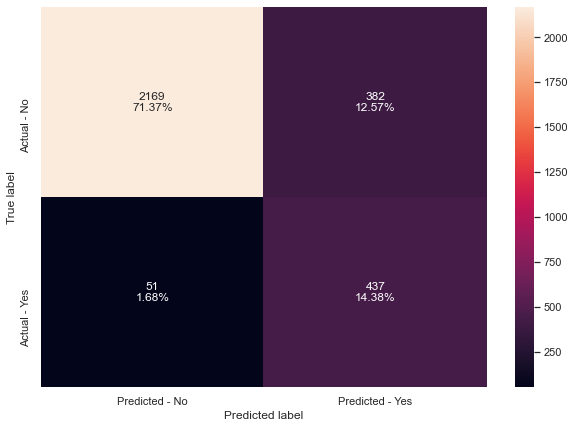

In [459]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

## <a id = "link27"></a>Gradient Boosting

## <a id = "link28"></a>Gradient Boosting - GridsearchCV

In [473]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.8)

In [475]:
# Creating new pipeline with best parameters
gbm_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier (
        n_estimators=50,
        subsample=0.9,
        max_features=0.7
    ),
)

# Fit the model on training data
gbm_tuned1.fit(X_train, y_train)




Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_features=0.7, n_estimators=50,
                                            subsample=0.9))])

Accuracy on training set :  0.9462471783295711
Accuracy on test set :  0.9358341559723593
Recall on training set :  0.7216856892010536
Recall on test set :  0.6700819672131147
Precision on training set :  0.927765237020316
Precision on test set :  0.9058171745152355


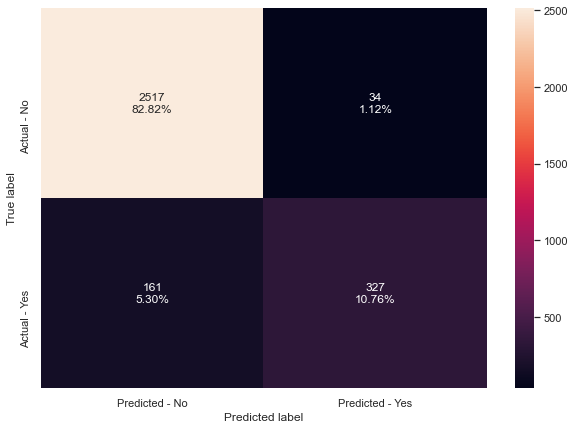

In [480]:
# Calculating different metrics
get_metrics_score(gbm_tuned1)

# Creating confusion matrix
make_confusion_matrix(gbm_tuned1, y_test)

## <a id = "link29"></a>Gradient Boosting - Randomizedsearch CV

In [478]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
randomized_cv = randomized_cv.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
randomized_cv.fit(X_train, y_train)
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': 250, 'max_features': 0.9} with CV score=0.7787773398253343:


In [479]:
# Creating new pipeline with best parameters
gbm_tuned2 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier (
        n_estimators=50,
        subsample=0.9,
        max_features=0.7
    ),
)

# Fit the model on training data
gbm_tuned2.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_features=0.7, n_estimators=50,
                                            subsample=0.9))])

Accuracy on training set :  0.9446952595936795
Accuracy on test set :  0.9358341559723593
Recall on training set :  0.7111501316944688
Recall on test set :  0.6680327868852459
Precision on training set :  0.9278350515463918
Precision on test set :  0.9080779944289693


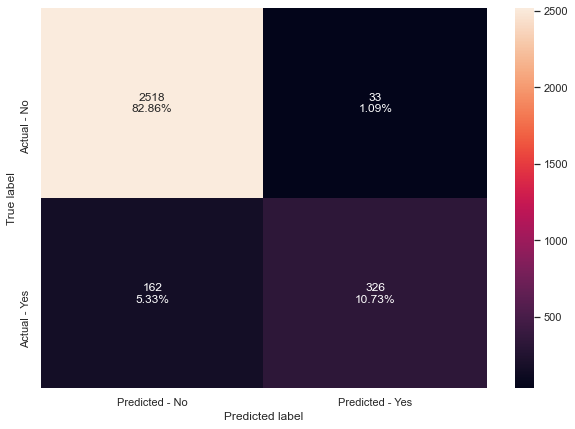

In [481]:
# Calculating different metrics
get_metrics_score(gbm_tuned2)

# Creating confusion matrix
make_confusion_matrix(gbm_tuned2, y_test)

In [487]:
# defining list of models
models = [xgb_tuned1, xgb_tuned2, dtree_tuned1, dtree_tuned2, gbm_tuned1, gbm_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [488]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "XGBoost tuned with GridSearchCV",
            "XGBoost tuned with RandomizedSearchCV",
            "Decision tree tuned with GridSearchCV",
            "Decision tree tuned with RandomizedSearchCV",
            "GradientBoosting tuned with GridSearchCV",
            "GradientBoosting tuned with RandomizedSearchCV"
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  \
0                 XGBoost tuned with GridSearchCV        0.902088   
1           XGBoost tuned with RandomizedSearchCV        0.885299   
2           Decision tree tuned with GridSearchCV        0.993651   
3     Decision tree tuned with RandomizedSearchCV        0.982929   
4        GradientBoosting tuned with GridSearchCV        0.946247   
5  GradientBoosting tuned with RandomizedSearchCV        0.944695   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0       0.874959      0.948200     0.895492         0.629738        0.570496  
1       0.857519      0.950834     0.895492         0.588587        0.533578  
2       0.909839      0.969271     0.723361         0.991023        0.717480  
3       0.910826      0.921861     0.711066         0.970425        0.727463  
4       0.935834      0.721686     0.670082         0.927765        0.905817  
5       0.935834      0.711150     0.668033         0.927835        0.908078

## <a id = "link30"></a>Model Performance:

- Selected and ran 3 models thro' Gridsearch and Randomized Search based on recall metrics. The models selected were XGBoost, Decision Tree & Gradient Boosting.

- XGBoost with gridsearch and random search have the same recall values in both using test data which signifies that both gridsearch and randomsearch performed well in searching the hyper-space. 
- XGBoost with randomsearch also performed well.
- Decision tree tuned with gridsearchCV performed better compared to all the models and even it outperformed XGB with randomsearchcv by 0.11.
- Gradientboosting didn't perform well compared to the other 2 models. 
- In terms of timings, XGB took almost 3 hours or so to perform gridsearch while XGB random one took almost half. I forgot to initiate a timer so the numbers are 

- Overall all the models are generalizing well in the test data as the recall scores are pretty much in-line with the training data.


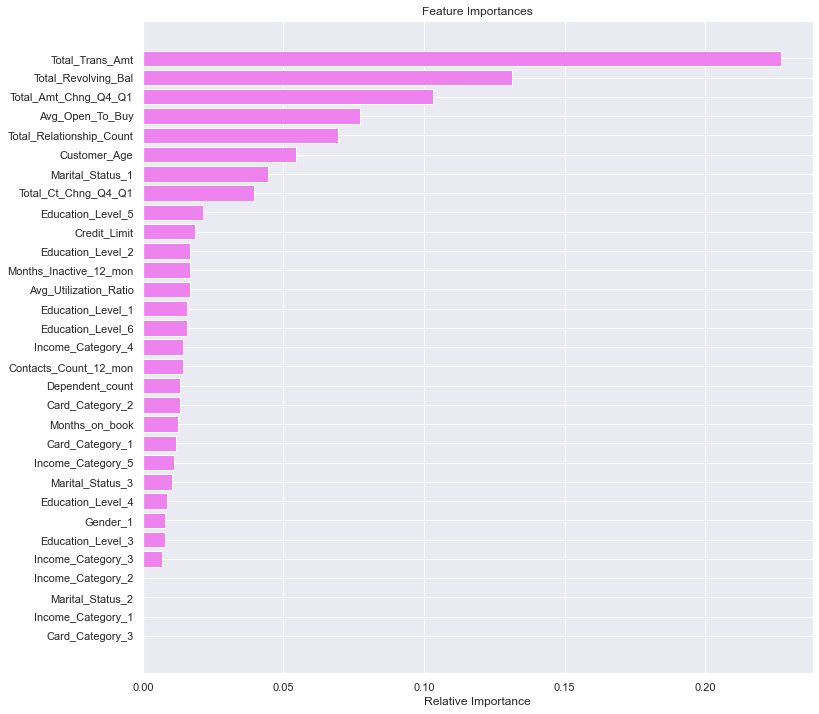

In [489]:
feature_names = X_train.columns
importances = xgb_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## <a id = "link31"></a>Insights & Recommendations

- Total trans amount is the top important feature in determining churn. If the total transaction amount is less then there is every likelihood that the customer might attrite.
- Lower the total revolving balance there is every likelihood that the customer might attrite
- Total Amt change Q4-Q1 is the next contributing factor towards customer attrition.
- Similarly, average opn to buy, number of products held with the bank, and customer age are also leading indicators to predict customer attrition.